In [1]:
using Flux
using Flux: @epochs, onehotbatch, throttle
using Statistics: mean, var, std
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
add_dim(x::Array) = reshape(x, (1,size(x)...));

In [3]:
TR = Float32;
TC = ComplexF32;

In [4]:
M = 16;
constellation_dim = 2;
N = 32*M;
SNR = 20;
SNRlin = 10^(SNR/10) |> TR;

In [5]:
encoder = Chain(Dense(M, 32, Flux.relu), Dense(32, 32, Flux.relu), Dense(32, constellation_dim));
decoder = Chain(Dense(constellation_dim, 32, Flux.relu), Dense(32, 32, Flux.relu), Dense(32, M));

In [6]:
function model(X)
    X_seed = Flux.onehotbatch(1:M,1:M)
    s_seed = encoder(X_seed)
    s_seed = add_dim(s_seed[1,:] + 1im*s_seed[2,:])
    norm_factor = sqrt(mean(abs.(s_seed).^2))
    
    s = encoder(X)
    s = add_dim(s[1,:] + 1im*s[2,:]) / norm_factor
    𝜎 = sqrt(1/SNRlin) |> TR
    
    r = s + 𝜎 * randn(TC, 1, N)
    r = [real(r); imag(r)]
    Y = decoder(r)
    return Y
end    

model (generic function with 1 method)

In [7]:
loss(X) = Flux.logitcrossentropy(model(X), X);

In [8]:
opt = ADAM(0.001);
ps = params(encoder, decoder);

In [9]:
X = Flux.onehotbatch(rand(1:M, N), 1:M)
data = [[X]]

1-element Array{Array{Flux.OneHotMatrix{Array{Flux.OneHotVector,1}},1},1}:
 [[false false … false false; false false … true false; … ; false false … false false; false false … false false]]

In [10]:
evalcb() = @show(loss(X));
@epochs 2000 Flux.train!(loss, ps, data, opt, cb = throttle(evalcb, 5));

┌ Info: Epoch 1
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.7953997f0 (tracked)


┌ Info: Epoch 2
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.7921095f0 (tracked)
loss(X) = 2.7860537f0 (tracked)
loss(X) = 2.7817268f0 (tracked)
loss(X) = 2.777435f0 (tracked)


┌ Info: Epoch 3
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 4
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 5
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 6
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.7736535f0 (tracked)
loss(X) = 2.769082f0 (tracked)
loss(X) = 2.764874f0 (tracked)
loss(X) = 2.761584f0 (tracked)
loss(X) = 2.7571769f0 (tracked)
loss(X) = 2.7522948f0 (tracked)
loss(X) = 2.748714f0 (tracked)
loss(X) = 2.7450442f0 (tracked)


┌ Info: Epoch 7
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 8
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 9
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 10
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 11
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 12
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 13
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 14
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.7408464f0 (tracked)
loss(X) = 2.7373424f0 (tracked)
loss(X) = 2.7337532f0 (tracked)
loss(X) = 2.7287815f0 (tracked)
loss(X) = 2.7255015f0 (tracked)
loss(X) = 2.7223675f0 (tracked)


┌ Info: Epoch 15
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 16
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 17
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 18
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 19
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 20
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.718277f0 (tracked)
loss(X) = 2.7152529f0 (tracked)
loss(X) = 2.710555f0 (tracked)
loss(X) = 2.7068233f0 (tracked)
loss(X) = 2.702299f0 (tracked)
loss(X) = 2.69899f0 (tracked)
loss(X) = 2.6948667f0 (tracked)
loss(X) = 2.6936507f0 (tracked)


┌ Info: Epoch 21
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 22
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 23
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 24
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 25
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 26
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 27
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 28
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.6893804f0 (tracked)
loss(X) = 2.6836216f0 (tracked)
loss(X) = 2.6785123f0 (tracked)
loss(X) = 2.6762953f0 (tracked)
loss(X) = 2.6729221f0 (tracked)
loss(X) = 2.668075f0 (tracked)
loss(X) = 2.6620505f0 (tracked)
loss(X) = 2.6580868f0 (tracked)
loss(X) = 2.6543162f0 (tracked)


┌ Info: Epoch 29
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 30
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 31
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 32
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 33
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 34
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 35
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 36
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 37
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.651925f0 (tracked)
loss(X) = 2.6455405f0 (tracked)
loss(X) = 2.6433125f0 (tracked)
loss(X) = 2.6350317f0 (tracked)
loss(X) = 2.629738f0 (tracked)
loss(X) = 2.6269696f0 (tracked)
loss(X) = 2.620802f0 (tracked)
loss(X) = 2.614718f0 (tracked)


┌ Info: Epoch 38
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 39
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 40
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 41
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 42
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 43
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 44
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 45
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.6112063f0 (tracked)
loss(X) = 2.6072717f0 (tracked)
loss(X) = 2.6008463f0 (tracked)
loss(X) = 2.5957227f0 (tracked)
loss(X) = 2.5903206f0 (tracked)
loss(X) = 2.5845208f0 (tracked)


┌ Info: Epoch 46
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 47
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 48
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 49
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 50
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 51
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 2.5798635f0 (tracked)
loss(X) = 2.575074f0 (tracked)
loss(X) = 2.5675786f0 (tracked)
loss(X) = 2.5610242f0 (tracked)
loss(X) = 2.5581763f0 (tracked)
loss(X) = 2.5523908f0 (tracked)
loss(X) = 2.5449963f0 (tracked)
loss(X) = 2.53942f0 (tracked)
loss(X) = 2.5328407f0 (tracked)
loss(X) = 2.5232267f0 (tracked)
loss(X) = 2.5160193f0 (tracked)
loss(X) = 2.5112364f0 (tracked)
loss(X) = 2.504931f0 (tracked)
loss(X) = 2.500005f0 (tracked)
loss(X) = 2.4933069f0 (tracked)
loss(X) = 2.4816575f0 (tracked)


┌ Info: Epoch 52
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 53
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 54
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 55
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 56
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 57
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 58
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 59
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 60
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 61
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 62
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/t

loss(X) = 2.4750752f0 (tracked)
loss(X) = 2.4709945f0 (tracked)
loss(X) = 2.461058f0 (tracked)
loss(X) = 2.4576259f0 (tracked)
loss(X) = 2.4461122f0 (tracked)
loss(X) = 2.4393692f0 (tracked)
loss(X) = 2.429135f0 (tracked)
loss(X) = 2.4241278f0 (tracked)
loss(X) = 2.4181767f0 (tracked)
loss(X) = 2.4078705f0 (tracked)
loss(X) = 2.4044285f0 (tracked)
loss(X) = 2.3959591f0 (tracked)
loss(X) = 2.3846006f0 (tracked)
loss(X) = 2.3761442f0 (tracked)
loss(X) = 2.36668f0 (tracked)


┌ Info: Epoch 68
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 69
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 70
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 71
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 72
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 73
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 74
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 75
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 76
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 77
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 78
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/t

loss(X) = 2.361127f0 (tracked)
loss(X) = 2.3529596f0 (tracked)
loss(X) = 2.3419442f0 (tracked)
loss(X) = 2.3350167f0 (tracked)
loss(X) = 2.3214006f0 (tracked)
loss(X) = 2.3181696f0 (tracked)
loss(X) = 2.3105767f0 (tracked)
loss(X) = 2.2969387f0 (tracked)
loss(X) = 2.2966218f0 (tracked)
loss(X) = 2.285381f0 (tracked)
loss(X) = 2.2734516f0 (tracked)
loss(X) = 2.265242f0 (tracked)
loss(X) = 2.256687f0 (tracked)
loss(X) = 2.2434683f0 (tracked)
loss(X) = 2.239966f0 (tracked)
loss(X) = 2.2241538f0 (tracked)


┌ Info: Epoch 83
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 84
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 85
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 86
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 87
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 88
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 89
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 90
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 91
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 92
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 93
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/t

loss(X) = 2.221568f0 (tracked)
loss(X) = 2.2042456f0 (tracked)
loss(X) = 2.2069936f0 (tracked)
loss(X) = 2.1938949f0 (tracked)
loss(X) = 2.1859193f0 (tracked)
loss(X) = 2.1824925f0 (tracked)
loss(X) = 2.171451f0 (tracked)
loss(X) = 2.1641746f0 (tracked)
loss(X) = 2.155747f0 (tracked)
loss(X) = 2.1476185f0 (tracked)
loss(X) = 2.13666f0 (tracked)
loss(X) = 2.129496f0 (tracked)
loss(X) = 2.1147346f0 (tracked)
loss(X) = 2.113214f0 (tracked)
loss(X) = 2.1057434f0 (tracked)


┌ Info: Epoch 99
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 100
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 101
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 102
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 103
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 104
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 105
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 106
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 107
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 108
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 109
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/

loss(X) = 2.0996528f0 (tracked)
loss(X) = 2.0925624f0 (tracked)
loss(X) = 2.0836344f0 (tracked)
loss(X) = 2.076355f0 (tracked)
loss(X) = 2.0710442f0 (tracked)
loss(X) = 2.0587056f0 (tracked)
loss(X) = 2.042721f0 (tracked)
loss(X) = 2.0497985f0 (tracked)
loss(X) = 2.034654f0 (tracked)
loss(X) = 2.0283384f0 (tracked)
loss(X) = 2.0199282f0 (tracked)
loss(X) = 2.01978f0 (tracked)
loss(X) = 2.010325f0 (tracked)
loss(X) = 2.0063477f0 (tracked)
loss(X) = 1.990269f0 (tracked)


┌ Info: Epoch 114
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 115
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 116
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 117
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 118
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 119
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 120
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 121
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 122
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 123
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 124
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.9803213f0 (tracked)
loss(X) = 1.9817843f0 (tracked)
loss(X) = 1.9663973f0 (tracked)
loss(X) = 1.9668336f0 (tracked)
loss(X) = 1.9525876f0 (tracked)
loss(X) = 1.9614122f0 (tracked)
loss(X) = 1.9488215f0 (tracked)
loss(X) = 1.9388953f0 (tracked)
loss(X) = 1.9262831f0 (tracked)
loss(X) = 1.9197664f0 (tracked)
loss(X) = 1.9172266f0 (tracked)
loss(X) = 1.9133794f0 (tracked)
loss(X) = 1.909596f0 (tracked)
loss(X) = 1.9062047f0 (tracked)
loss(X) = 1.8949763f0 (tracked)


┌ Info: Epoch 129
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 130
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 131
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 132
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 133
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 134
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 135
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 136
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 137
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 138
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 139
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.8892996f0 (tracked)
loss(X) = 1.879648f0 (tracked)
loss(X) = 1.8794693f0 (tracked)
loss(X) = 1.8720583f0 (tracked)
loss(X) = 1.8639956f0 (tracked)
loss(X) = 1.8575153f0 (tracked)
loss(X) = 1.8496448f0 (tracked)
loss(X) = 1.8493025f0 (tracked)
loss(X) = 1.8313186f0 (tracked)
loss(X) = 1.8394785f0 (tracked)
loss(X) = 1.8260893f0 (tracked)
loss(X) = 1.8261977f0 (tracked)
loss(X) = 1.814508f0 (tracked)
loss(X) = 1.8173532f0 (tracked)


┌ Info: Epoch 144
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 145
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 146
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 147
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 148
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 149
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 150
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 151
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 152
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 153
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 154
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.8027676f0 (tracked)
loss(X) = 1.8027437f0 (tracked)
loss(X) = 1.7976131f0 (tracked)
loss(X) = 1.7961591f0 (tracked)
loss(X) = 1.7832892f0 (tracked)
loss(X) = 1.7806886f0 (tracked)
loss(X) = 1.7788838f0 (tracked)
loss(X) = 1.7650337f0 (tracked)
loss(X) = 1.7660451f0 (tracked)
loss(X) = 1.756432f0 (tracked)
loss(X) = 1.748749f0 (tracked)
loss(X) = 1.7451942f0 (tracked)
loss(X) = 1.7354048f0 (tracked)
loss(X) = 1.7411461f0 (tracked)
loss(X) = 1.732338f0 (tracked)


┌ Info: Epoch 158
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 159
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 160
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 161
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 162
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 163
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 164
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 165
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 166
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 167
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 168
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.7290993f0 (tracked)
loss(X) = 1.7236307f0 (tracked)
loss(X) = 1.7213202f0 (tracked)
loss(X) = 1.7166498f0 (tracked)
loss(X) = 1.7147746f0 (tracked)
loss(X) = 1.7052765f0 (tracked)
loss(X) = 1.7002997f0 (tracked)
loss(X) = 1.694197f0 (tracked)
loss(X) = 1.6839545f0 (tracked)
loss(X) = 1.6768037f0 (tracked)
loss(X) = 1.6707677f0 (tracked)
loss(X) = 1.6781187f0 (tracked)
loss(X) = 1.671859f0 (tracked)
loss(X) = 1.6643337f0 (tracked)
loss(X) = 1.6609199f0 (tracked)


┌ Info: Epoch 173
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 174
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 175
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 176
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 177
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 178
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 179
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 180
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 181
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 182
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 183
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.6497986f0 (tracked)
loss(X) = 1.6429107f0 (tracked)
loss(X) = 1.6474094f0 (tracked)
loss(X) = 1.6329468f0 (tracked)
loss(X) = 1.6257341f0 (tracked)
loss(X) = 1.6266174f0 (tracked)
loss(X) = 1.6234617f0 (tracked)
loss(X) = 1.6100166f0 (tracked)
loss(X) = 1.6049473f0 (tracked)
loss(X) = 1.6137879f0 (tracked)
loss(X) = 1.5997081f0 (tracked)
loss(X) = 1.5943842f0 (tracked)
loss(X) = 1.5948315f0 (tracked)
loss(X) = 1.57995f0 (tracked)
loss(X) = 1.5772117f0 (tracked)


┌ Info: Epoch 188
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 189
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 190
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 191
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 192
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 193
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 194
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 195
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 196
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 197
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 198
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.5839429f0 (tracked)
loss(X) = 1.5715877f0 (tracked)
loss(X) = 1.5632942f0 (tracked)
loss(X) = 1.5470854f0 (tracked)
loss(X) = 1.5529182f0 (tracked)
loss(X) = 1.5626007f0 (tracked)
loss(X) = 1.5552713f0 (tracked)
loss(X) = 1.5453508f0 (tracked)
loss(X) = 1.5369527f0 (tracked)
loss(X) = 1.5350301f0 (tracked)
loss(X) = 1.5247211f0 (tracked)
loss(X) = 1.5212011f0 (tracked)
loss(X) = 1.5237681f0 (tracked)
loss(X) = 1.5034213f0 (tracked)
loss(X) = 1.50911f0 (tracked)
loss(X) = 1.4960365f0 (tracked)
loss(X) = 1.4971104f0 (tracked)
loss(X) = 1.4927034f0 (tracked)
loss(X) = 1.499378f0 (tracked)


┌ Info: Epoch 203
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 204
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 205
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 206
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 207
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 208
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 209
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 210
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 211
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 212
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 213
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.4758295f0 (tracked)
loss(X) = 1.4823769f0 (tracked)
loss(X) = 1.462782f0 (tracked)
loss(X) = 1.4675028f0 (tracked)
loss(X) = 1.4624422f0 (tracked)
loss(X) = 1.46713f0 (tracked)
loss(X) = 1.4477177f0 (tracked)
loss(X) = 1.4523685f0 (tracked)
loss(X) = 1.4567038f0 (tracked)
loss(X) = 1.4484009f0 (tracked)
loss(X) = 1.4399083f0 (tracked)
loss(X) = 1.4330595f0 (tracked)
loss(X) = 1.4414642f0 (tracked)
loss(X) = 1.431103f0 (tracked)
loss(X) = 1.4318755f0 (tracked)
loss(X) = 1.4147645f0 (tracked)


┌ Info: Epoch 222
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 223
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 224
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 225
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 226
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 227
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 228
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 229
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 230
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 231
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 232
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.4202387f0 (tracked)
loss(X) = 1.4223617f0 (tracked)
loss(X) = 1.3907237f0 (tracked)
loss(X) = 1.3938948f0 (tracked)
loss(X) = 1.384061f0 (tracked)
loss(X) = 1.3828218f0 (tracked)
loss(X) = 1.3824396f0 (tracked)
loss(X) = 1.3722477f0 (tracked)
loss(X) = 1.3688844f0 (tracked)
loss(X) = 1.3736668f0 (tracked)
loss(X) = 1.3793051f0 (tracked)
loss(X) = 1.36655f0 (tracked)
loss(X) = 1.356504f0 (tracked)


┌ Info: Epoch 238
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 239
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 240
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 241
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 242
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 243
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 244
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 245
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 246
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 247
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 248
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.3555123f0 (tracked)
loss(X) = 1.3453685f0 (tracked)
loss(X) = 1.3430563f0 (tracked)
loss(X) = 1.352871f0 (tracked)
loss(X) = 1.3348912f0 (tracked)
loss(X) = 1.3450006f0 (tracked)
loss(X) = 1.3219602f0 (tracked)
loss(X) = 1.3249192f0 (tracked)
loss(X) = 1.3065088f0 (tracked)
loss(X) = 1.3024756f0 (tracked)
loss(X) = 1.3074353f0 (tracked)
loss(X) = 1.2952666f0 (tracked)
loss(X) = 1.3058758f0 (tracked)


┌ Info: Epoch 251
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 252
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 253
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 254
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 255
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 256
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 257
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 258
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 259
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 260
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 261
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.3048594f0 (tracked)
loss(X) = 1.2975895f0 (tracked)
loss(X) = 1.2894354f0 (tracked)
loss(X) = 1.2734667f0 (tracked)
loss(X) = 1.274112f0 (tracked)
loss(X) = 1.2744064f0 (tracked)
loss(X) = 1.2585514f0 (tracked)
loss(X) = 1.2527359f0 (tracked)
loss(X) = 1.2662382f0 (tracked)
loss(X) = 1.2599344f0 (tracked)
loss(X) = 1.2443568f0 (tracked)


┌ Info: Epoch 264
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 265
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 266
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 267
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 268
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 269
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 270
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 271
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 272
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 273
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 274
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.2584367f0 (tracked)
loss(X) = 1.2385895f0 (tracked)
loss(X) = 1.2482398f0 (tracked)
loss(X) = 1.2334223f0 (tracked)
loss(X) = 1.2304523f0 (tracked)
loss(X) = 1.2187951f0 (tracked)
loss(X) = 1.2150784f0 (tracked)
loss(X) = 1.222944f0 (tracked)
loss(X) = 1.2014618f0 (tracked)
loss(X) = 1.1878765f0 (tracked)
loss(X) = 1.1926137f0 (tracked)
loss(X) = 1.1972212f0 (tracked)
loss(X) = 1.1868663f0 (tracked)


┌ Info: Epoch 275
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 276
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 277
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 278
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 279
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 280
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 281
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 282
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 283
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 284
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 285
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.1815314f0 (tracked)
loss(X) = 1.1724256f0 (tracked)
loss(X) = 1.1785153f0 (tracked)
loss(X) = 1.1627953f0 (tracked)
loss(X) = 1.1608118f0 (tracked)
loss(X) = 1.1627691f0 (tracked)
loss(X) = 1.1673906f0 (tracked)
loss(X) = 1.1579747f0 (tracked)
loss(X) = 1.1401879f0 (tracked)
loss(X) = 1.139412f0 (tracked)
loss(X) = 1.1367698f0 (tracked)
loss(X) = 1.1320045f0 (tracked)


┌ Info: Epoch 288
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 289
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 290
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 291
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 292
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 293
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 294
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 295
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 296
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 297
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 298
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.1388338f0 (tracked)
loss(X) = 1.1345937f0 (tracked)
loss(X) = 1.1201341f0 (tracked)
loss(X) = 1.1279337f0 (tracked)
loss(X) = 1.1143492f0 (tracked)
loss(X) = 1.1196647f0 (tracked)
loss(X) = 1.1198575f0 (tracked)
loss(X) = 1.1150668f0 (tracked)
loss(X) = 1.0960379f0 (tracked)
loss(X) = 1.1203816f0 (tracked)
loss(X) = 1.124932f0 (tracked)
loss(X) = 1.0783975f0 (tracked)
loss(X) = 1.0777295f0 (tracked)
loss(X) = 1.0988657f0 (tracked)


┌ Info: Epoch 300
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 301
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 302
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 303
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 304
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 305
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 306
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 307
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 308
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 309
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 310
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.0841088f0 (tracked)
loss(X) = 1.0796692f0 (tracked)
loss(X) = 1.0775764f0 (tracked)
loss(X) = 1.0545602f0 (tracked)
loss(X) = 1.0736521f0 (tracked)
loss(X) = 1.0764095f0 (tracked)
loss(X) = 1.0519966f0 (tracked)
loss(X) = 1.050417f0 (tracked)
loss(X) = 1.0462059f0 (tracked)
loss(X) = 1.0462034f0 (tracked)
loss(X) = 1.0424166f0 (tracked)


┌ Info: Epoch 314
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 315
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 316
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 317
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 318
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 319
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 320
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 321
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 322
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 323
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 324
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 1.0480318f0 (tracked)
loss(X) = 1.0253162f0 (tracked)
loss(X) = 1.0276501f0 (tracked)
loss(X) = 1.0195174f0 (tracked)
loss(X) = 1.0252652f0 (tracked)
loss(X) = 1.0192883f0 (tracked)
loss(X) = 1.0007801f0 (tracked)
loss(X) = 1.0077236f0 (tracked)
loss(X) = 1.0089189f0 (tracked)
loss(X) = 1.0070473f0 (tracked)
loss(X) = 0.9905579f0 (tracked)
loss(X) = 0.99828637f0 (tracked)
loss(X) = 0.9983651f0 (tracked)


┌ Info: Epoch 325
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 326
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 327
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 328
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 329
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 330
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 331
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 332
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 333
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 334
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 335
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.9812622f0 (tracked)
loss(X) = 0.99835294f0 (tracked)
loss(X) = 0.978914f0 (tracked)
loss(X) = 0.9795936f0 (tracked)
loss(X) = 0.9711081f0 (tracked)
loss(X) = 0.9751388f0 (tracked)
loss(X) = 0.94273365f0 (tracked)
loss(X) = 0.9569711f0 (tracked)
loss(X) = 0.9604097f0 (tracked)
loss(X) = 0.96346354f0 (tracked)
loss(X) = 0.9660468f0 (tracked)
loss(X) = 0.9708203f0 (tracked)
loss(X) = 0.94791275f0 (tracked)
loss(X) = 0.94893765f0 (tracked)
loss(X) = 0.959777f0 (tracked)
loss(X) = 0.9351166f0 (tracked)


┌ Info: Epoch 338
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 339
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 340
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 341
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 342
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 343
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 344
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 345
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 346
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 347
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 348
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.94345844f0 (tracked)
loss(X) = 0.9342489f0 (tracked)
loss(X) = 0.9276166f0 (tracked)
loss(X) = 0.917818f0 (tracked)
loss(X) = 0.9332185f0 (tracked)
loss(X) = 0.92305803f0 (tracked)
loss(X) = 0.89468527f0 (tracked)
loss(X) = 0.8994376f0 (tracked)
loss(X) = 0.9034599f0 (tracked)
loss(X) = 0.9360812f0 (tracked)
loss(X) = 0.9148799f0 (tracked)
loss(X) = 0.8992219f0 (tracked)
loss(X) = 0.8981699f0 (tracked)


┌ Info: Epoch 354
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 355
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 356
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 357
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 358
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 359
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 360
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 361
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 362
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 363
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 364
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.88908994f0 (tracked)
loss(X) = 0.90146005f0 (tracked)
loss(X) = 0.90294707f0 (tracked)
loss(X) = 0.87387633f0 (tracked)
loss(X) = 0.87436104f0 (tracked)
loss(X) = 0.8805891f0 (tracked)
loss(X) = 0.8832011f0 (tracked)
loss(X) = 0.87321556f0 (tracked)
loss(X) = 0.8661978f0 (tracked)
loss(X) = 0.88411665f0 (tracked)
loss(X) = 0.85855776f0 (tracked)
loss(X) = 0.8690505f0 (tracked)
loss(X) = 0.87579715f0 (tracked)
loss(X) = 0.8518274f0 (tracked)


┌ Info: Epoch 367
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 368
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 369
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 370
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 371
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 372
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 373
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 374
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 375
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 376
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 377
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.8683413f0 (tracked)
loss(X) = 0.85613275f0 (tracked)
loss(X) = 0.8396871f0 (tracked)
loss(X) = 0.85148036f0 (tracked)
loss(X) = 0.83692014f0 (tracked)
loss(X) = 0.85293114f0 (tracked)
loss(X) = 0.8258327f0 (tracked)
loss(X) = 0.8415307f0 (tracked)
loss(X) = 0.8280059f0 (tracked)
loss(X) = 0.8516755f0 (tracked)
loss(X) = 0.81139314f0 (tracked)
loss(X) = 0.8229891f0 (tracked)
loss(X) = 0.826367f0 (tracked)


┌ Info: Epoch 381
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 382
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 383
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 384
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 385
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 386
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 387
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 388
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 389
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 390
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 391
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.82940483f0 (tracked)
loss(X) = 0.81854725f0 (tracked)
loss(X) = 0.8292756f0 (tracked)
loss(X) = 0.8229562f0 (tracked)
loss(X) = 0.78354895f0 (tracked)
loss(X) = 0.8006954f0 (tracked)
loss(X) = 0.7989775f0 (tracked)
loss(X) = 0.8154567f0 (tracked)
loss(X) = 0.79978234f0 (tracked)
loss(X) = 0.8198467f0 (tracked)
loss(X) = 0.80779064f0 (tracked)
loss(X) = 0.78442955f0 (tracked)
loss(X) = 0.81543213f0 (tracked)


┌ Info: Epoch 394
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 395
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 396
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 397
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 398
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 399
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 400
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 401
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 402
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 403
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 404
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.7991773f0 (tracked)
loss(X) = 0.80011696f0 (tracked)
loss(X) = 0.7982811f0 (tracked)
loss(X) = 0.8002706f0 (tracked)
loss(X) = 0.7795174f0 (tracked)
loss(X) = 0.79403967f0 (tracked)
loss(X) = 0.78248847f0 (tracked)
loss(X) = 0.7689814f0 (tracked)
loss(X) = 0.75619733f0 (tracked)
loss(X) = 0.7754654f0 (tracked)
loss(X) = 0.7799167f0 (tracked)
loss(X) = 0.7818728f0 (tracked)
loss(X) = 0.76983094f0 (tracked)
loss(X) = 0.79215574f0 (tracked)
loss(X) = 0.76217675f0 (tracked)


┌ Info: Epoch 407
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 408
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 409
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 410
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 411
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 412
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 413
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 414
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 415
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 416
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 417
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.7635229f0 (tracked)
loss(X) = 0.76714385f0 (tracked)
loss(X) = 0.7844607f0 (tracked)
loss(X) = 0.7782028f0 (tracked)
loss(X) = 0.7565904f0 (tracked)
loss(X) = 0.7698807f0 (tracked)
loss(X) = 0.7465623f0 (tracked)
loss(X) = 0.75730294f0 (tracked)


┌ Info: Epoch 422
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 423
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 424
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 425
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 426
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 427
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 428
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 429
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.76157784f0 (tracked)
loss(X) = 0.75973487f0 (tracked)
loss(X) = 0.7804204f0 (tracked)
loss(X) = 0.7323908f0 (tracked)
loss(X) = 0.75159526f0 (tracked)
loss(X) = 0.7447947f0 (tracked)
loss(X) = 0.7457896f0 (tracked)
loss(X) = 0.7551796f0 (tracked)


┌ Info: Epoch 430
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 431
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 432
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 433
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 434
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 435
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 436
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 437
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.79406863f0 (tracked)
loss(X) = 0.73587775f0 (tracked)
loss(X) = 0.7400104f0 (tracked)
loss(X) = 0.7353575f0 (tracked)
loss(X) = 0.7306158f0 (tracked)
loss(X) = 0.73575944f0 (tracked)


┌ Info: Epoch 438
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 439
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 440
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 441
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 442
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 443
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.76345783f0 (tracked)
loss(X) = 0.7517015f0 (tracked)
loss(X) = 0.72996855f0 (tracked)
loss(X) = 0.7274836f0 (tracked)
loss(X) = 0.72291374f0 (tracked)
loss(X) = 0.748279f0 (tracked)
loss(X) = 0.725976f0 (tracked)


┌ Info: Epoch 444
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 445
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 446
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 447
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 448
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 449
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 450
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.73555994f0 (tracked)
loss(X) = 0.70814985f0 (tracked)
loss(X) = 0.71464986f0 (tracked)
loss(X) = 0.701028f0 (tracked)
loss(X) = 0.7007439f0 (tracked)
loss(X) = 0.73083997f0 (tracked)
loss(X) = 0.6692509f0 (tracked)
loss(X) = 0.7119928f0 (tracked)
loss(X) = 0.6852567f0 (tracked)


┌ Info: Epoch 451
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 452
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 453
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 454
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 455
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 456
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 457
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 458
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 459
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.7020695f0 (tracked)
loss(X) = 0.7186418f0 (tracked)
loss(X) = 0.71314794f0 (tracked)
loss(X) = 0.71469516f0 (tracked)
loss(X) = 0.6924512f0 (tracked)
loss(X) = 0.69687617f0 (tracked)
loss(X) = 0.67678195f0 (tracked)
loss(X) = 0.68344533f0 (tracked)
loss(X) = 0.70587647f0 (tracked)
loss(X) = 0.6961577f0 (tracked)
loss(X) = 0.69633126f0 (tracked)
loss(X) = 0.70466036f0 (tracked)
loss(X) = 0.69935167f0 (tracked)


┌ Info: Epoch 460
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 461
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 462
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 463
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 464
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 465
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 466
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 467
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 468
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 469
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 470
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.6837578f0 (tracked)
loss(X) = 0.6925399f0 (tracked)
loss(X) = 0.7018781f0 (tracked)
loss(X) = 0.67560184f0 (tracked)
loss(X) = 0.68357253f0 (tracked)
loss(X) = 0.7022446f0 (tracked)
loss(X) = 0.70110023f0 (tracked)
loss(X) = 0.6787385f0 (tracked)
loss(X) = 0.693861f0 (tracked)
loss(X) = 0.6704905f0 (tracked)
loss(X) = 0.6693634f0 (tracked)
loss(X) = 0.7024055f0 (tracked)
loss(X) = 0.6695015f0 (tracked)


┌ Info: Epoch 473
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 474
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 475
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 476
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 477
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 478
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 479
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 480
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 481
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 482
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 483
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.6588665f0 (tracked)
loss(X) = 0.67643535f0 (tracked)
loss(X) = 0.66784966f0 (tracked)
loss(X) = 0.66481674f0 (tracked)
loss(X) = 0.6975237f0 (tracked)
loss(X) = 0.661331f0 (tracked)
loss(X) = 0.65354896f0 (tracked)
loss(X) = 0.68075484f0 (tracked)
loss(X) = 0.6753211f0 (tracked)
loss(X) = 0.68022543f0 (tracked)
loss(X) = 0.6630809f0 (tracked)
loss(X) = 0.6456236f0 (tracked)
loss(X) = 0.64035845f0 (tracked)
loss(X) = 0.6690177f0 (tracked)


┌ Info: Epoch 486
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 487
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 488
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 489
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 490
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 491
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 492
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 493
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 494
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 495
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 496
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.6399766f0 (tracked)
loss(X) = 0.64864516f0 (tracked)
loss(X) = 0.65963316f0 (tracked)
loss(X) = 0.66295135f0 (tracked)
loss(X) = 0.65553737f0 (tracked)
loss(X) = 0.70194805f0 (tracked)
loss(X) = 0.6693735f0 (tracked)
loss(X) = 0.66976506f0 (tracked)
loss(X) = 0.646019f0 (tracked)
loss(X) = 0.66617066f0 (tracked)
loss(X) = 0.6527776f0 (tracked)
loss(X) = 0.63302904f0 (tracked)
loss(X) = 0.6608846f0 (tracked)
loss(X) = 0.63679886f0 (tracked)


┌ Info: Epoch 500
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 501
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 502
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 503
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 504
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 505
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 506
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 507
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 508
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 509
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 510
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.6719728f0 (tracked)
loss(X) = 0.64683557f0 (tracked)
loss(X) = 0.63632846f0 (tracked)
loss(X) = 0.6519175f0 (tracked)
loss(X) = 0.6440129f0 (tracked)


┌ Info: Epoch 514
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 515
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 516
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 517
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 518
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.64522797f0 (tracked)
loss(X) = 0.63682383f0 (tracked)
loss(X) = 0.64240175f0 (tracked)
loss(X) = 0.64922434f0 (tracked)
loss(X) = 0.6583769f0 (tracked)
loss(X) = 0.64783835f0 (tracked)


┌ Info: Epoch 519
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 520
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 521
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 522
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 523
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 524
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.6197262f0 (tracked)
loss(X) = 0.6751312f0 (tracked)
loss(X) = 0.62332994f0 (tracked)
loss(X) = 0.6192176f0 (tracked)
loss(X) = 0.6743975f0 (tracked)
loss(X) = 0.63654983f0 (tracked)
loss(X) = 0.67540693f0 (tracked)


┌ Info: Epoch 525
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 526
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 527
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 528
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 529
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 530
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 531
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.649969f0 (tracked)
loss(X) = 0.66203094f0 (tracked)
loss(X) = 0.61546993f0 (tracked)
loss(X) = 0.6452262f0 (tracked)
loss(X) = 0.61978567f0 (tracked)
loss(X) = 0.6163455f0 (tracked)
loss(X) = 0.6434647f0 (tracked)
loss(X) = 0.6367277f0 (tracked)


┌ Info: Epoch 532
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 533
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 534
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 535
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 536
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 537
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 538
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 539
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.67219704f0 (tracked)
loss(X) = 0.6298425f0 (tracked)
loss(X) = 0.62933046f0 (tracked)
loss(X) = 0.638946f0 (tracked)
loss(X) = 0.5860987f0 (tracked)
loss(X) = 0.61748457f0 (tracked)
loss(X) = 0.62323606f0 (tracked)
loss(X) = 0.64813876f0 (tracked)
loss(X) = 0.61210394f0 (tracked)
loss(X) = 0.65056336f0 (tracked)
loss(X) = 0.6188603f0 (tracked)
loss(X) = 0.62489563f0 (tracked)
loss(X) = 0.63139457f0 (tracked)
loss(X) = 0.6106212f0 (tracked)
loss(X) = 0.60351276f0 (tracked)


┌ Info: Epoch 540
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 541
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 542
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 543
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 544
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 545
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 546
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 547
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 548
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 549
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 550
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.6472772f0 (tracked)
loss(X) = 0.61219496f0 (tracked)
loss(X) = 0.62600267f0 (tracked)
loss(X) = 0.6316972f0 (tracked)
loss(X) = 0.5894997f0 (tracked)
loss(X) = 0.59844655f0 (tracked)
loss(X) = 0.6128312f0 (tracked)
loss(X) = 0.58983445f0 (tracked)
loss(X) = 0.6184339f0 (tracked)
loss(X) = 0.5886391f0 (tracked)
loss(X) = 0.6104415f0 (tracked)
loss(X) = 0.63687974f0 (tracked)
loss(X) = 0.6229948f0 (tracked)
loss(X) = 0.58976215f0 (tracked)
loss(X) = 0.6374326f0 (tracked)


┌ Info: Epoch 555
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 556
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 557
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 558
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 559
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 560
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 561
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 562
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 563
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 564
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 565
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5695884f0 (tracked)
loss(X) = 0.64141345f0 (tracked)
loss(X) = 0.59903926f0 (tracked)
loss(X) = 0.60708904f0 (tracked)
loss(X) = 0.6075084f0 (tracked)
loss(X) = 0.6343543f0 (tracked)
loss(X) = 0.6293316f0 (tracked)
loss(X) = 0.62808716f0 (tracked)
loss(X) = 0.6238532f0 (tracked)
loss(X) = 0.6102595f0 (tracked)
loss(X) = 0.6195763f0 (tracked)
loss(X) = 0.60275126f0 (tracked)
loss(X) = 0.6355367f0 (tracked)
loss(X) = 0.61128867f0 (tracked)


┌ Info: Epoch 570
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 571
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 572
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 573
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 574
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 575
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 576
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 577
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 578
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 579
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 580
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5941624f0 (tracked)
loss(X) = 0.6243501f0 (tracked)


┌ Info: Epoch 584
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 585
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5893416f0 (tracked)
loss(X) = 0.5869758f0 (tracked)
loss(X) = 0.58996403f0 (tracked)
loss(X) = 0.5961443f0 (tracked)
loss(X) = 0.5981554f0 (tracked)
loss(X) = 0.57158935f0 (tracked)
loss(X) = 0.60090417f0 (tracked)
loss(X) = 0.5858867f0 (tracked)
loss(X) = 0.6035731f0 (tracked)
loss(X) = 0.59844035f0 (tracked)
loss(X) = 0.60751843f0 (tracked)
loss(X) = 0.6049188f0 (tracked)
loss(X) = 0.6177306f0 (tracked)
loss(X) = 0.62758005f0 (tracked)


┌ Info: Epoch 586
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 587
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 588
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 589
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 590
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 591
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 592
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 593
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 594
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 595
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 596
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.6023601f0 (tracked)
loss(X) = 0.6323242f0 (tracked)
loss(X) = 0.59982324f0 (tracked)
loss(X) = 0.63802403f0 (tracked)
loss(X) = 0.5837529f0 (tracked)
loss(X) = 0.6393751f0 (tracked)


┌ Info: Epoch 600
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 601
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 602
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 603
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 604
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 605
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5969667f0 (tracked)
loss(X) = 0.6138693f0 (tracked)
loss(X) = 0.59379953f0 (tracked)
loss(X) = 0.6147276f0 (tracked)
loss(X) = 0.5747264f0 (tracked)
loss(X) = 0.6023523f0 (tracked)
loss(X) = 0.55645895f0 (tracked)
loss(X) = 0.5859333f0 (tracked)
loss(X) = 0.6028422f0 (tracked)


┌ Info: Epoch 606
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 607
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 608
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 609
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 610
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 611
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 612
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 613
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 614
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.57273865f0 (tracked)
loss(X) = 0.5966115f0 (tracked)
loss(X) = 0.5909029f0 (tracked)
loss(X) = 0.6070559f0 (tracked)
loss(X) = 0.58665264f0 (tracked)
loss(X) = 0.5868666f0 (tracked)
loss(X) = 0.59178054f0 (tracked)
loss(X) = 0.5822269f0 (tracked)
loss(X) = 0.584594f0 (tracked)


┌ Info: Epoch 615
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 616
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 617
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 618
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 619
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 620
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 621
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 622
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 623
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.6024127f0 (tracked)
loss(X) = 0.60629904f0 (tracked)
loss(X) = 0.59258884f0 (tracked)
loss(X) = 0.63991356f0 (tracked)
loss(X) = 0.59691745f0 (tracked)
loss(X) = 0.59801394f0 (tracked)
loss(X) = 0.61991274f0 (tracked)
loss(X) = 0.56789625f0 (tracked)
loss(X) = 0.594695f0 (tracked)
loss(X) = 0.5991892f0 (tracked)
loss(X) = 0.59874034f0 (tracked)
loss(X) = 0.57621634f0 (tracked)
loss(X) = 0.57021046f0 (tracked)


┌ Info: Epoch 624
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 625
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 626
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 627
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 628
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 629
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 630
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 631
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 632
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 633
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 634
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5959639f0 (tracked)
loss(X) = 0.5633925f0 (tracked)
loss(X) = 0.58715177f0 (tracked)
loss(X) = 0.571309f0 (tracked)
loss(X) = 0.5862191f0 (tracked)
loss(X) = 0.5894776f0 (tracked)
loss(X) = 0.5562191f0 (tracked)
loss(X) = 0.5744914f0 (tracked)
loss(X) = 0.605307f0 (tracked)
loss(X) = 0.60121226f0 (tracked)
loss(X) = 0.608837f0 (tracked)
loss(X) = 0.57087916f0 (tracked)


┌ Info: Epoch 637
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 638
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 639
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 640
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 641
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 642
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 643
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 644
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 645
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 646
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 647
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5855487f0 (tracked)
loss(X) = 0.59863657f0 (tracked)
loss(X) = 0.5998019f0 (tracked)
loss(X) = 0.57689804f0 (tracked)
loss(X) = 0.56353974f0 (tracked)
loss(X) = 0.55920875f0 (tracked)
loss(X) = 0.5804744f0 (tracked)
loss(X) = 0.61345315f0 (tracked)
loss(X) = 0.6045123f0 (tracked)
loss(X) = 0.5744164f0 (tracked)
loss(X) = 0.60653687f0 (tracked)
loss(X) = 0.569612f0 (tracked)


┌ Info: Epoch 649
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 650
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 651
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 652
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 653
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 654
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 655
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 656
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 657
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 658
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 659
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.58001465f0 (tracked)
loss(X) = 0.6052884f0 (tracked)
loss(X) = 0.5642015f0 (tracked)
loss(X) = 0.5497936f0 (tracked)
loss(X) = 0.6000148f0 (tracked)
loss(X) = 0.5782795f0 (tracked)
loss(X) = 0.5637859f0 (tracked)
loss(X) = 0.5468493f0 (tracked)
loss(X) = 0.5464195f0 (tracked)
loss(X) = 0.57169414f0 (tracked)
loss(X) = 0.6001656f0 (tracked)
loss(X) = 0.61034596f0 (tracked)
loss(X) = 0.59607315f0 (tracked)
loss(X) = 0.61524975f0 (tracked)


┌ Info: Epoch 661
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 662
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 663
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 664
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 665
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 666
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 667
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 668
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 669
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 670
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 671
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5894611f0 (tracked)
loss(X) = 0.5556311f0 (tracked)
loss(X) = 0.5526253f0 (tracked)
loss(X) = 0.5707489f0 (tracked)
loss(X) = 0.57211596f0 (tracked)
loss(X) = 0.5681078f0 (tracked)
loss(X) = 0.5457943f0 (tracked)
loss(X) = 0.5889292f0 (tracked)
loss(X) = 0.57037854f0 (tracked)
loss(X) = 0.6015481f0 (tracked)
loss(X) = 0.5689069f0 (tracked)
loss(X) = 0.55068326f0 (tracked)
loss(X) = 0.5656806f0 (tracked)
loss(X) = 0.5759325f0 (tracked)


┌ Info: Epoch 675
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 676
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 677
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 678
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 679
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 680
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 681
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 682
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 683
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 684
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 685
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.58803546f0 (tracked)
loss(X) = 0.55733895f0 (tracked)
loss(X) = 0.5630892f0 (tracked)
loss(X) = 0.55592054f0 (tracked)
loss(X) = 0.6001446f0 (tracked)
loss(X) = 0.5940141f0 (tracked)
loss(X) = 0.6153583f0 (tracked)
loss(X) = 0.5750223f0 (tracked)
loss(X) = 0.57988703f0 (tracked)
loss(X) = 0.6077358f0 (tracked)
loss(X) = 0.60387605f0 (tracked)
loss(X) = 0.5564368f0 (tracked)
loss(X) = 0.575956f0 (tracked)
loss(X) = 0.56161654f0 (tracked)


┌ Info: Epoch 689
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 690
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 691
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 692
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 693
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 694
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 695
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 696
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 697
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 698
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 699
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5484556f0 (tracked)
loss(X) = 0.5738701f0 (tracked)
loss(X) = 0.5608189f0 (tracked)
loss(X) = 0.57603055f0 (tracked)
loss(X) = 0.5605602f0 (tracked)
loss(X) = 0.5264121f0 (tracked)
loss(X) = 0.57923687f0 (tracked)
loss(X) = 0.5768169f0 (tracked)
loss(X) = 0.55991954f0 (tracked)
loss(X) = 0.55294436f0 (tracked)
loss(X) = 0.5422882f0 (tracked)
loss(X) = 0.51618207f0 (tracked)
loss(X) = 0.5812216f0 (tracked)
loss(X) = 0.5445707f0 (tracked)
loss(X) = 0.5948421f0 (tracked)


┌ Info: Epoch 703
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 704
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 705
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 706
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 707
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 708
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 709
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 710
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 711
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 712
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 713
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.53782105f0 (tracked)
loss(X) = 0.5763724f0 (tracked)
loss(X) = 0.5443825f0 (tracked)
loss(X) = 0.5429965f0 (tracked)
loss(X) = 0.6307125f0 (tracked)
loss(X) = 0.5636917f0 (tracked)
loss(X) = 0.57095385f0 (tracked)
loss(X) = 0.6036806f0 (tracked)
loss(X) = 0.53981894f0 (tracked)
loss(X) = 0.5493777f0 (tracked)
loss(X) = 0.54746616f0 (tracked)
loss(X) = 0.5236558f0 (tracked)
loss(X) = 0.5452206f0 (tracked)


┌ Info: Epoch 718
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 719
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 720
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 721
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 722
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 723
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 724
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 725
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 726
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 727
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 728
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.53317666f0 (tracked)
loss(X) = 0.58547974f0 (tracked)
loss(X) = 0.53971213f0 (tracked)
loss(X) = 0.56791866f0 (tracked)
loss(X) = 0.5511837f0 (tracked)
loss(X) = 0.53275084f0 (tracked)
loss(X) = 0.5480599f0 (tracked)
loss(X) = 0.52968746f0 (tracked)


┌ Info: Epoch 731
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 732
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 733
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 734
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 735
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 736
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 737
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 738
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.592034f0 (tracked)
loss(X) = 0.53956604f0 (tracked)
loss(X) = 0.5498631f0 (tracked)
loss(X) = 0.5504502f0 (tracked)
loss(X) = 0.5629097f0 (tracked)
loss(X) = 0.56031024f0 (tracked)
loss(X) = 0.57204545f0 (tracked)
loss(X) = 0.55413306f0 (tracked)
loss(X) = 0.53891903f0 (tracked)
loss(X) = 0.5784242f0 (tracked)


┌ Info: Epoch 739
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 740
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 741
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 742
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 743
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 744
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 745
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 746
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 747
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 748
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5684952f0 (tracked)
loss(X) = 0.5583059f0 (tracked)
loss(X) = 0.57461596f0 (tracked)
loss(X) = 0.53281856f0 (tracked)
loss(X) = 0.56307495f0 (tracked)


┌ Info: Epoch 749
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 750
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 751
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 752
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 753
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5583385f0 (tracked)
loss(X) = 0.58067757f0 (tracked)
loss(X) = 0.5619434f0 (tracked)
loss(X) = 0.54906154f0 (tracked)
loss(X) = 0.55127025f0 (tracked)
loss(X) = 0.5776834f0 (tracked)
loss(X) = 0.57163835f0 (tracked)
loss(X) = 0.57782245f0 (tracked)


┌ Info: Epoch 754
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 755
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 756
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 757
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 758
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 759
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 760
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 761
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.53716546f0 (tracked)
loss(X) = 0.58414537f0 (tracked)
loss(X) = 0.5548574f0 (tracked)
loss(X) = 0.54583216f0 (tracked)
loss(X) = 0.57823086f0 (tracked)
loss(X) = 0.5923643f0 (tracked)
loss(X) = 0.5734805f0 (tracked)
loss(X) = 0.53402126f0 (tracked)
loss(X) = 0.5158441f0 (tracked)


┌ Info: Epoch 762
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 763
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 764
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 765
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 766
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 767
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 768
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 769
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 770
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5361616f0 (tracked)
loss(X) = 0.55779386f0 (tracked)
loss(X) = 0.57592666f0 (tracked)
loss(X) = 0.5378021f0 (tracked)
loss(X) = 0.5345527f0 (tracked)
loss(X) = 0.54339564f0 (tracked)
loss(X) = 0.559963f0 (tracked)
loss(X) = 0.54534626f0 (tracked)
loss(X) = 0.51884377f0 (tracked)
loss(X) = 0.5238303f0 (tracked)
loss(X) = 0.5697055f0 (tracked)
loss(X) = 0.56019706f0 (tracked)
loss(X) = 0.535415f0 (tracked)


┌ Info: Epoch 771
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 772
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 773
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 774
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 775
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 776
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 777
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 778
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 779
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 780
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 781
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5615951f0 (tracked)
loss(X) = 0.549044f0 (tracked)
loss(X) = 0.5600384f0 (tracked)
loss(X) = 0.56182754f0 (tracked)
loss(X) = 0.61010003f0 (tracked)
loss(X) = 0.5667114f0 (tracked)
loss(X) = 0.5576069f0 (tracked)
loss(X) = 0.5642055f0 (tracked)
loss(X) = 0.56261706f0 (tracked)
loss(X) = 0.5619358f0 (tracked)
loss(X) = 0.51661336f0 (tracked)


┌ Info: Epoch 784
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 785
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 786
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 787
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 788
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 789
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 790
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 791
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 792
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 793
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 794
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.56323814f0 (tracked)
loss(X) = 0.52525574f0 (tracked)
loss(X) = 0.5123154f0 (tracked)
loss(X) = 0.557555f0 (tracked)
loss(X) = 0.55310583f0 (tracked)
loss(X) = 0.5480621f0 (tracked)
loss(X) = 0.51645494f0 (tracked)
loss(X) = 0.56056315f0 (tracked)
loss(X) = 0.57083285f0 (tracked)
loss(X) = 0.5800096f0 (tracked)
loss(X) = 0.542377f0 (tracked)
loss(X) = 0.5326431f0 (tracked)
loss(X) = 0.60823965f0 (tracked)
loss(X) = 0.5335702f0 (tracked)
loss(X) = 0.5183309f0 (tracked)


┌ Info: Epoch 795
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 796
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 797
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 798
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 799
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 800
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 801
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 802
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 803
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 804
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 805
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5618038f0 (tracked)
loss(X) = 0.5541001f0 (tracked)
loss(X) = 0.52631724f0 (tracked)
loss(X) = 0.5326555f0 (tracked)
loss(X) = 0.5314559f0 (tracked)
loss(X) = 0.5593772f0 (tracked)
loss(X) = 0.54023945f0 (tracked)
loss(X) = 0.567011f0 (tracked)
loss(X) = 0.5693276f0 (tracked)
loss(X) = 0.5560097f0 (tracked)
loss(X) = 0.5777375f0 (tracked)
loss(X) = 0.5114913f0 (tracked)
loss(X) = 0.5751445f0 (tracked)


┌ Info: Epoch 810
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 811
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 812
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 813
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 814
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 815
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 816
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 817
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 818
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 819
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 820
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5538925f0 (tracked)
loss(X) = 0.5445651f0 (tracked)
loss(X) = 0.55211276f0 (tracked)
loss(X) = 0.5370712f0 (tracked)
loss(X) = 0.5357465f0 (tracked)
loss(X) = 0.5784961f0 (tracked)
loss(X) = 0.5638803f0 (tracked)
loss(X) = 0.5158475f0 (tracked)
loss(X) = 0.56808555f0 (tracked)
loss(X) = 0.55942965f0 (tracked)
loss(X) = 0.5145092f0 (tracked)
loss(X) = 0.57276773f0 (tracked)
loss(X) = 0.50677305f0 (tracked)


┌ Info: Epoch 823
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 824
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 825
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 826
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 827
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 828
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 829
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 830
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 831
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 832
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 833
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.55552125f0 (tracked)
loss(X) = 0.54125285f0 (tracked)
loss(X) = 0.53711605f0 (tracked)
loss(X) = 0.5409285f0 (tracked)
loss(X) = 0.59623295f0 (tracked)
loss(X) = 0.5372319f0 (tracked)
loss(X) = 0.55353355f0 (tracked)
loss(X) = 0.5496435f0 (tracked)
loss(X) = 0.53424627f0 (tracked)
loss(X) = 0.56041956f0 (tracked)
loss(X) = 0.541855f0 (tracked)


┌ Info: Epoch 836
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 837
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 838
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 839
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 840
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 841
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 842
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 843
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 844
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 845
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 846
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.54736793f0 (tracked)
loss(X) = 0.53983605f0 (tracked)
loss(X) = 0.520521f0 (tracked)
loss(X) = 0.5952797f0 (tracked)
loss(X) = 0.57137287f0 (tracked)
loss(X) = 0.5531233f0 (tracked)


┌ Info: Epoch 847
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 848
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 849
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 850
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 851
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 852
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5541601f0 (tracked)
loss(X) = 0.51763296f0 (tracked)
loss(X) = 0.5181662f0 (tracked)
loss(X) = 0.5536773f0 (tracked)
loss(X) = 0.5438328f0 (tracked)
loss(X) = 0.5476974f0 (tracked)
loss(X) = 0.52814656f0 (tracked)
loss(X) = 0.58812976f0 (tracked)


┌ Info: Epoch 853
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 854
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 855
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 856
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 857
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 858
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 859
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 860
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5619425f0 (tracked)
loss(X) = 0.5197364f0 (tracked)
loss(X) = 0.53870785f0 (tracked)
loss(X) = 0.55418706f0 (tracked)
loss(X) = 0.5473385f0 (tracked)
loss(X) = 0.49570054f0 (tracked)
loss(X) = 0.5570309f0 (tracked)
loss(X) = 0.5451697f0 (tracked)
loss(X) = 0.5561241f0 (tracked)
loss(X) = 0.57457924f0 (tracked)
loss(X) = 0.52457124f0 (tracked)


┌ Info: Epoch 861
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 862
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 863
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 864
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 865
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 866
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 867
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 868
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 869
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 870
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 871
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.52400595f0 (tracked)
loss(X) = 0.5087117f0 (tracked)
loss(X) = 0.5720548f0 (tracked)
loss(X) = 0.5249461f0 (tracked)
loss(X) = 0.5278944f0 (tracked)
loss(X) = 0.55755734f0 (tracked)
loss(X) = 0.5576693f0 (tracked)
loss(X) = 0.5623026f0 (tracked)
loss(X) = 0.5739591f0 (tracked)
loss(X) = 0.51401687f0 (tracked)
loss(X) = 0.55869603f0 (tracked)
loss(X) = 0.51947427f0 (tracked)
loss(X) = 0.5393049f0 (tracked)
loss(X) = 0.5648185f0 (tracked)


┌ Info: Epoch 872
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 873
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 874
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 875
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 876
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 877
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 878
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 879
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 880
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 881
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 882
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5238725f0 (tracked)
loss(X) = 0.58442694f0 (tracked)
loss(X) = 0.5664425f0 (tracked)
loss(X) = 0.576561f0 (tracked)
loss(X) = 0.5803323f0 (tracked)
loss(X) = 0.5608568f0 (tracked)
loss(X) = 0.5281558f0 (tracked)
loss(X) = 0.5353409f0 (tracked)
loss(X) = 0.57434356f0 (tracked)
loss(X) = 0.5522127f0 (tracked)
loss(X) = 0.53476614f0 (tracked)
loss(X) = 0.56861544f0 (tracked)
loss(X) = 0.54557335f0 (tracked)
loss(X) = 0.528709f0 (tracked)
loss(X) = 0.59759736f0 (tracked)


┌ Info: Epoch 886
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 887
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 888
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 889
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 890
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 891
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 892
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 893
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 894
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 895
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 896
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5757154f0 (tracked)
loss(X) = 0.56233895f0 (tracked)
loss(X) = 0.5559386f0 (tracked)
loss(X) = 0.53948283f0 (tracked)
loss(X) = 0.5525556f0 (tracked)
loss(X) = 0.49653697f0 (tracked)
loss(X) = 0.5511749f0 (tracked)
loss(X) = 0.52489066f0 (tracked)
loss(X) = 0.5353874f0 (tracked)
loss(X) = 0.5584226f0 (tracked)
loss(X) = 0.50155956f0 (tracked)
loss(X) = 0.52621824f0 (tracked)
loss(X) = 0.5661187f0 (tracked)
loss(X) = 0.5747309f0 (tracked)


┌ Info: Epoch 901
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 902
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 903
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 904
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 905
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 906
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 907
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 908
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 909
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 910
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 911
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.56845266f0 (tracked)
loss(X) = 0.534549f0 (tracked)
loss(X) = 0.52837247f0 (tracked)
loss(X) = 0.55126154f0 (tracked)
loss(X) = 0.47776538f0 (tracked)
loss(X) = 0.5741946f0 (tracked)
loss(X) = 0.5725616f0 (tracked)
loss(X) = 0.5507425f0 (tracked)
loss(X) = 0.5451268f0 (tracked)
loss(X) = 0.5675008f0 (tracked)
loss(X) = 0.52405775f0 (tracked)
loss(X) = 0.5015001f0 (tracked)
loss(X) = 0.5418414f0 (tracked)
loss(X) = 0.5923152f0 (tracked)
loss(X) = 0.55015004f0 (tracked)


┌ Info: Epoch 915
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 916
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 917
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 918
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 919
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 920
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 921
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 922
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 923
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 924
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 925
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5181124f0 (tracked)
loss(X) = 0.5488669f0 (tracked)
loss(X) = 0.50871444f0 (tracked)
loss(X) = 0.5282923f0 (tracked)
loss(X) = 0.5443373f0 (tracked)
loss(X) = 0.49838045f0 (tracked)
loss(X) = 0.5393417f0 (tracked)
loss(X) = 0.52913713f0 (tracked)
loss(X) = 0.4999305f0 (tracked)
loss(X) = 0.54578245f0 (tracked)
loss(X) = 0.5439304f0 (tracked)
loss(X) = 0.52666116f0 (tracked)
loss(X) = 0.5174045f0 (tracked)
loss(X) = 0.58248925f0 (tracked)

┌ Info: Epoch 930
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 931
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 932
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 933
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 934
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 935
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 936
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 937
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 938
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 939
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 940
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src


loss(X) = 0.5187351f0 (tracked)
loss(X) = 0.55190057f0 (tracked)
loss(X) = 0.55940056f0 (tracked)
loss(X) = 0.5515471f0 (tracked)
loss(X) = 0.5618241f0 (tracked)
loss(X) = 0.5340426f0 (tracked)
loss(X) = 0.5469823f0 (tracked)
loss(X) = 0.5364984f0 (tracked)
loss(X) = 0.5467283f0 (tracked)
loss(X) = 0.5301812f0 (tracked)
loss(X) = 0.49903202f0 (tracked)
loss(X) = 0.5557143f0 (tracked)
loss(X) = 0.5311487f0 (tracked)


┌ Info: Epoch 943
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 944
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 945
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 946
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 947
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 948
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 949
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 950
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 951
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 952
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 953
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5302794f0 (tracked)
loss(X) = 0.5598672f0 (tracked)
loss(X) = 0.59113824f0 (tracked)
loss(X) = 0.5205214f0 (tracked)
loss(X) = 0.52939177f0 (tracked)
loss(X) = 0.51848215f0 (tracked)
loss(X) = 0.56574035f0 (tracked)
loss(X) = 0.5325796f0 (tracked)
loss(X) = 0.53596866f0 (tracked)
loss(X) = 0.551278f0 (tracked)
loss(X) = 0.51340795f0 (tracked)
loss(X) = 0.55360126f0 (tracked)
loss(X) = 0.5577051f0 (tracked)


┌ Info: Epoch 957
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 958
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 959
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 960
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 961
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 962
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 963
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 964
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 965
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 966
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 967
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5524503f0 (tracked)
loss(X) = 0.54262656f0 (tracked)
loss(X) = 0.5352683f0 (tracked)
loss(X) = 0.51978314f0 (tracked)
loss(X) = 0.51786065f0 (tracked)
loss(X) = 0.54151124f0 (tracked)
loss(X) = 0.5260612f0 (tracked)
loss(X) = 0.5648432f0 (tracked)
loss(X) = 0.52786696f0 (tracked)
loss(X) = 0.54876465f0 (tracked)
loss(X) = 0.5573633f0 (tracked)
loss(X) = 0.5317311f0 (tracked)
loss(X) = 0.5415721f0 (tracked)


┌ Info: Epoch 970
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 971
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 972
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 973
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 974
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 975
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 976
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 977
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 978
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 979
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 980
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.55825996f0 (tracked)
loss(X) = 0.5393083f0 (tracked)
loss(X) = 0.537773f0 (tracked)
loss(X) = 0.53388137f0 (tracked)
loss(X) = 0.5318055f0 (tracked)
loss(X) = 0.5632044f0 (tracked)
loss(X) = 0.5286157f0 (tracked)
loss(X) = 0.53646874f0 (tracked)
loss(X) = 0.5410799f0 (tracked)
loss(X) = 0.5538745f0 (tracked)
loss(X) = 0.5593065f0 (tracked)
loss(X) = 0.52186936f0 (tracked)


┌ Info: Epoch 983
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 984
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 985
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 986
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 987
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 988
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 989
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 990
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 991
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 992
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 993
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src

loss(X) = 0.5288606f0 (tracked)
loss(X) = 0.53842545f0 (tracked)
loss(X) = 0.5080657f0 (tracked)
loss(X) = 0.5609578f0 (tracked)
loss(X) = 0.53436196f0 (tracked)
loss(X) = 0.57489204f0 (tracked)
loss(X) = 0.5100604f0 (tracked)
loss(X) = 0.5370722f0 (tracked)
loss(X) = 0.5437591f0 (tracked)
loss(X) = 0.5257005f0 (tracked)


┌ Info: Epoch 995
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 996
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 997
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 998
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 999
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1000
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1001
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1002
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1003
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1004
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5207524f0 (tracked)
loss(X) = 0.52940035f0 (tracked)
loss(X) = 0.51222414f0 (tracked)
loss(X) = 0.52584654f0 (tracked)
loss(X) = 0.53497f0 (tracked)
loss(X) = 0.5014427f0 (tracked)
loss(X) = 0.55139196f0 (tracked)
loss(X) = 0.533668f0 (tracked)
loss(X) = 0.52195096f0 (tracked)


┌ Info: Epoch 1005
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1006
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1007
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1008
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1009
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1010
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1011
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1012
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1013
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5464723f0 (tracked)
loss(X) = 0.5530087f0 (tracked)
loss(X) = 0.5361451f0 (tracked)
loss(X) = 0.5207592f0 (tracked)
loss(X) = 0.5091367f0 (tracked)
loss(X) = 0.544989f0 (tracked)
loss(X) = 0.511443f0 (tracked)
loss(X) = 0.5275246f0 (tracked)
loss(X) = 0.5314716f0 (tracked)
loss(X) = 0.5624606f0 (tracked)
loss(X) = 0.5763314f0 (tracked)
loss(X) = 0.4923479f0 (tracked)
loss(X) = 0.5381305f0 (tracked)
loss(X) = 0.5164721f0 (tracked)


┌ Info: Epoch 1014
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1015
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1016
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1017
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1018
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1019
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1020
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1021
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1022
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1023
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1024
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.55906796f0 (tracked)
loss(X) = 0.52975214f0 (tracked)
loss(X) = 0.52995765f0 (tracked)
loss(X) = 0.52009207f0 (tracked)
loss(X) = 0.53321916f0 (tracked)
loss(X) = 0.5581844f0 (tracked)
loss(X) = 0.5192669f0 (tracked)
loss(X) = 0.52404356f0 (tracked)
loss(X) = 0.6011258f0 (tracked)
loss(X) = 0.565148f0 (tracked)
loss(X) = 0.5404029f0 (tracked)
loss(X) = 0.53773355f0 (tracked)
loss(X) = 0.53949714f0 (tracked)


┌ Info: Epoch 1028
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1029
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1030
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1031
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1032
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1033
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1034
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1035
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1036
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1037
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1038
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.53300476f0 (tracked)
loss(X) = 0.5583057f0 (tracked)
loss(X) = 0.51233643f0 (tracked)
loss(X) = 0.48204613f0 (tracked)
loss(X) = 0.5632788f0 (tracked)
loss(X) = 0.52143854f0 (tracked)
loss(X) = 0.5120479f0 (tracked)
loss(X) = 0.49859998f0 (tracked)
loss(X) = 0.51860356f0 (tracked)
loss(X) = 0.50245297f0 (tracked)
loss(X) = 0.5469169f0 (tracked)
loss(X) = 0.5213026f0 (tracked)
loss(X) = 0.57912385f0 (tracked)


┌ Info: Epoch 1041
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1042
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1043
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1044
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1045
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1046
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1047
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1048
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1049
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1050
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1051
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.55252206f0 (tracked)
loss(X) = 0.54010475f0 (tracked)
loss(X) = 0.56017554f0 (tracked)
loss(X) = 0.59267163f0 (tracked)
loss(X) = 0.5183997f0 (tracked)
loss(X) = 0.5240563f0 (tracked)
loss(X) = 0.5427078f0 (tracked)
loss(X) = 0.5620158f0 (tracked)
loss(X) = 0.4950252f0 (tracked)
loss(X) = 0.5374733f0 (tracked)
loss(X) = 0.6009728f0 (tracked)
loss(X) = 0.5199664f0 (tracked)
loss(X) = 0.55607605f0 (tracked)


┌ Info: Epoch 1054
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1055
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1056
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1057
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1058
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1059
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1060
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1061
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1062
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1063
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1064
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5358551f0 (tracked)
loss(X) = 0.55675733f0 (tracked)
loss(X) = 0.5722164f0 (tracked)
loss(X) = 0.54541177f0 (tracked)
loss(X) = 0.5342436f0 (tracked)
loss(X) = 0.5427425f0 (tracked)
loss(X) = 0.5185822f0 (tracked)
loss(X) = 0.538534f0 (tracked)
loss(X) = 0.55594414f0 (tracked)
loss(X) = 0.5096723f0 (tracked)
loss(X) = 0.56494737f0 (tracked)
loss(X) = 0.51945615f0 (tracked)


┌ Info: Epoch 1067
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1068
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1069
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1070
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1071
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1072
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1073
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1074
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1075
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1076
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1077
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.52124584f0 (tracked)
loss(X) = 0.51346016f0 (tracked)
loss(X) = 0.5486807f0 (tracked)
loss(X) = 0.51729107f0 (tracked)
loss(X) = 0.5697322f0 (tracked)
loss(X) = 0.5153265f0 (tracked)
loss(X) = 0.5666856f0 (tracked)
loss(X) = 0.51359856f0 (tracked)
loss(X) = 0.5041194f0 (tracked)
loss(X) = 0.53294635f0 (tracked)
loss(X) = 0.52101433f0 (tracked)
loss(X) = 0.5289058f0 (tracked)
loss(X) = 0.50299084f0 (tracked)
loss(X) = 0.5291449f0 (tracked)


┌ Info: Epoch 1079
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1080
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1081
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1082
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1083
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1084
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1085
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1086
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1087
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1088
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1089
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.52565926f0 (tracked)
loss(X) = 0.5254789f0 (tracked)
loss(X) = 0.5409657f0 (tracked)
loss(X) = 0.52172774f0 (tracked)
loss(X) = 0.5402981f0 (tracked)
loss(X) = 0.5775142f0 (tracked)
loss(X) = 0.55652356f0 (tracked)

┌ Info: Epoch 1093
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1094
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1095
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1096
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1097
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1098
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105



loss(X) = 0.50187963f0 (tracked)
loss(X) = 0.555452f0 (tracked)
loss(X) = 0.48753163f0 (tracked)
loss(X) = 0.53877056f0 (tracked)
loss(X) = 0.55231696f0 (tracked)
loss(X) = 0.5283539f0 (tracked)


┌ Info: Epoch 1099
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1100
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1101
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1102
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1103
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1104
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1105
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.48932981f0 (tracked)
loss(X) = 0.5284565f0 (tracked)
loss(X) = 0.5810741f0 (tracked)
loss(X) = 0.5178993f0 (tracked)
loss(X) = 0.53674597f0 (tracked)
loss(X) = 0.5130813f0 (tracked)


┌ Info: Epoch 1106
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1107
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1108
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1109
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1110
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1111
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5419873f0 (tracked)
loss(X) = 0.5448032f0 (tracked)
loss(X) = 0.53235114f0 (tracked)
loss(X) = 0.54570574f0 (tracked)
loss(X) = 0.5039113f0 (tracked)
loss(X) = 0.52649224f0 (tracked)
loss(X) = 0.50817126f0 (tracked)
loss(X) = 0.5040022f0 (tracked)
loss(X) = 0.5247458f0 (tracked)
loss(X) = 0.58300626f0 (tracked)


┌ Info: Epoch 1112
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1113
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1114
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1115
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1116
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1117
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1118
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1119
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1120
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1121
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.55067873f0 (tracked)
loss(X) = 0.5553062f0 (tracked)
loss(X) = 0.49721503f0 (tracked)
loss(X) = 0.48709288f0 (tracked)
loss(X) = 0.52542734f0 (tracked)
loss(X) = 0.51331997f0 (tracked)
loss(X) = 0.54845876f0 (tracked)
loss(X) = 0.5044794f0 (tracked)
loss(X) = 0.53574705f0 (tracked)
loss(X) = 0.5763095f0 (tracked)
loss(X) = 0.53794795f0 (tracked)
loss(X) = 0.52821696f0 (tracked)
loss(X) = 0.5072402f0 (tracked)
loss(X) = 0.5243937f0 (tracked)


┌ Info: Epoch 1122
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1123
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1124
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1125
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1126
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1127
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1128
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1129
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1130
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1131
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1132
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.56260884f0 (tracked)
loss(X) = 0.47203586f0 (tracked)
loss(X) = 0.5380019f0 (tracked)
loss(X) = 0.5243267f0 (tracked)
loss(X) = 0.50055206f0 (tracked)
loss(X) = 0.5480181f0 (tracked)
loss(X) = 0.5383114f0 (tracked)
loss(X) = 0.5319542f0 (tracked)
loss(X) = 0.5813147f0 (tracked)
loss(X) = 0.508121f0 (tracked)
loss(X) = 0.5436645f0 (tracked)
loss(X) = 0.506762f0 (tracked)
loss(X) = 0.53953844f0 (tracked)
loss(X) = 0.5531806f0 (tracked)


┌ Info: Epoch 1136
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1137
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1138
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1139
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1140
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1141
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1142
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1143
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1144
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1145
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1146
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.48097387f0 (tracked)
loss(X) = 0.5459656f0 (tracked)
loss(X) = 0.5638981f0 (tracked)
loss(X) = 0.49050617f0 (tracked)
loss(X) = 0.5302031f0 (tracked)
loss(X) = 0.5403982f0 (tracked)
loss(X) = 0.5203947f0 (tracked)
loss(X) = 0.53493464f0 (tracked)
loss(X) = 0.5544655f0 (tracked)
loss(X) = 0.5538595f0 (tracked)
loss(X) = 0.5578358f0 (tracked)


┌ Info: Epoch 1150
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1151
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1152
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1153
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1154
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1155
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1156
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1157
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1158
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1159
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1160
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5220957f0 (tracked)
loss(X) = 0.49611145f0 (tracked)
loss(X) = 0.56282294f0 (tracked)
loss(X) = 0.49263483f0 (tracked)
loss(X) = 0.5297057f0 (tracked)
loss(X) = 0.5253958f0 (tracked)
loss(X) = 0.5354112f0 (tracked)
loss(X) = 0.48279396f0 (tracked)
loss(X) = 0.48434782f0 (tracked)
loss(X) = 0.5108674f0 (tracked)
loss(X) = 0.52429044f0 (tracked)
loss(X) = 0.6054468f0 (tracked)
loss(X) = 0.51324815f0 (tracked)
loss(X) = 0.47882834f0 (tracked)
loss(X) = 0.4888078f0 (tracked)


┌ Info: Epoch 1161
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1162
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1163
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1164
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1165
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1166
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1167
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1168
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1169
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1170
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1171
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.4952056f0 (tracked)
loss(X) = 0.52868515f0 (tracked)
loss(X) = 0.5105884f0 (tracked)
loss(X) = 0.5118529f0 (tracked)
loss(X) = 0.5265765f0 (tracked)
loss(X) = 0.4778604f0 (tracked)
loss(X) = 0.5731386f0 (tracked)
loss(X) = 0.52598226f0 (tracked)
loss(X) = 0.51321864f0 (tracked)
loss(X) = 0.53387094f0 (tracked)
loss(X) = 0.57397914f0 (tracked)


┌ Info: Epoch 1176
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1177
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1178
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1179
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1180
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1181
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1182
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1183
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1184
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1185
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1186
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.53497964f0 (tracked)
loss(X) = 0.5612328f0 (tracked)
loss(X) = 0.4945957f0 (tracked)
loss(X) = 0.5430063f0 (tracked)
loss(X) = 0.48517075f0 (tracked)
loss(X) = 0.49019212f0 (tracked)
loss(X) = 0.47883967f0 (tracked)
loss(X) = 0.4883774f0 (tracked)
loss(X) = 0.5368825f0 (tracked)
loss(X) = 0.5005585f0 (tracked)
loss(X) = 0.5462747f0 (tracked)
loss(X) = 0.5225153f0 (tracked)


┌ Info: Epoch 1187
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1188
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1189
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1190
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1191
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1192
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1193
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1194
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1195
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1196
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1197
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5205881f0 (tracked)
loss(X) = 0.54171586f0 (tracked)
loss(X) = 0.567194f0 (tracked)
loss(X) = 0.50731957f0 (tracked)
loss(X) = 0.53649265f0 (tracked)
loss(X) = 0.5675694f0 (tracked)
loss(X) = 0.5545399f0 (tracked)
loss(X) = 0.51405686f0 (tracked)
loss(X) = 0.4871112f0 (tracked)
loss(X) = 0.5279758f0 (tracked)
loss(X) = 0.5455754f0 (tracked)
loss(X) = 0.52242583f0 (tracked)


┌ Info: Epoch 1199
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1200
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1201
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1202
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1203
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1204
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1205
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1206
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1207
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1208
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1209
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.54782534f0 (tracked)
loss(X) = 0.5288321f0 (tracked)
loss(X) = 0.52207947f0 (tracked)
loss(X) = 0.52780116f0 (tracked)
loss(X) = 0.51236993f0 (tracked)
loss(X) = 0.5300189f0 (tracked)
loss(X) = 0.54511905f0 (tracked)
loss(X) = 0.53397006f0 (tracked)
loss(X) = 0.5268799f0 (tracked)
loss(X) = 0.5257609f0 (tracked)
loss(X) = 0.5482731f0 (tracked)
loss(X) = 0.5415976f0 (tracked)
loss(X) = 0.5188576f0 (tracked)

┌ Info: Epoch 1211
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1212
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1213
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1214
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1215
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1216
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1217
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1218
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1219
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1220
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1221
└ @ Main /home/rasmus/.julia/packages/Flu


loss(X) = 0.526759f0 (tracked)
loss(X) = 0.48727596f0 (tracked)
loss(X) = 0.5161484f0 (tracked)
loss(X) = 0.5771552f0 (tracked)
loss(X) = 0.53443265f0 (tracked)
loss(X) = 0.5274118f0 (tracked)
loss(X) = 0.476282f0 (tracked)
loss(X) = 0.53455824f0 (tracked)
loss(X) = 0.56218946f0 (tracked)
loss(X) = 0.5355178f0 (tracked)
loss(X) = 0.5283752f0 (tracked)
loss(X) = 0.5248153f0 (tracked)


┌ Info: Epoch 1223
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1224
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1225
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1226
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1227
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1228
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1229
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1230
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1231
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1232
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1233
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.528502f0 (tracked)
loss(X) = 0.53330564f0 (tracked)
loss(X) = 0.5007565f0 (tracked)
loss(X) = 0.5134666f0 (tracked)
loss(X) = 0.5456276f0 (tracked)
loss(X) = 0.5249604f0 (tracked)
loss(X) = 0.48942518f0 (tracked)
loss(X) = 0.5039946f0 (tracked)
loss(X) = 0.5399523f0 (tracked)
loss(X) = 0.5377874f0 (tracked)
loss(X) = 0.49770388f0 (tracked)
loss(X) = 0.5511245f0 (tracked)
loss(X) = 0.5637608f0 (tracked)


┌ Info: Epoch 1236
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1237
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1238
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1239
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1240
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1241
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1242
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1243
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1244
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1245
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1246
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5267475f0 (tracked)
loss(X) = 0.5428035f0 (tracked)
loss(X) = 0.5265534f0 (tracked)
loss(X) = 0.509868f0 (tracked)
loss(X) = 0.5237242f0 (tracked)
loss(X) = 0.547485f0 (tracked)
loss(X) = 0.50479895f0 (tracked)
loss(X) = 0.5417731f0 (tracked)
loss(X) = 0.5424257f0 (tracked)
loss(X) = 0.5001599f0 (tracked)
loss(X) = 0.49772954f0 (tracked)
loss(X) = 0.58910584f0 (tracked)
loss(X) = 0.5027295f0 (tracked)
loss(X) = 0.54331756f0 (tracked)
loss(X) = 0.47552326f0 (tracked)


┌ Info: Epoch 1249
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1250
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1251
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1252
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1253
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1254
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1255
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1256
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1257
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1258
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1259
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5430331f0 (tracked)
loss(X) = 0.5272219f0 (tracked)
loss(X) = 0.5003232f0 (tracked)
loss(X) = 0.54035103f0 (tracked)
loss(X) = 0.5374384f0 (tracked)
loss(X) = 0.55444896f0 (tracked)
loss(X) = 0.5415481f0 (tracked)
loss(X) = 0.54324794f0 (tracked)
loss(X) = 0.5652536f0 (tracked)
loss(X) = 0.49443758f0 (tracked)
loss(X) = 0.52629054f0 (tracked)
loss(X) = 0.5181064f0 (tracked)


┌ Info: Epoch 1264
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1265
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1266
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1267
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1268
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1269
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1270
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1271
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1272
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1273
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1274
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.6205311f0 (tracked)
loss(X) = 0.514956f0 (tracked)
loss(X) = 0.5262119f0 (tracked)
loss(X) = 0.53308046f0 (tracked)
loss(X) = 0.49131072f0 (tracked)
loss(X) = 0.5409107f0 (tracked)
loss(X) = 0.53804564f0 (tracked)
loss(X) = 0.5353004f0 (tracked)
loss(X) = 0.53680134f0 (tracked)
loss(X) = 0.5460826f0 (tracked)
loss(X) = 0.5274131f0 (tracked)
loss(X) = 0.45630646f0 (tracked)


┌ Info: Epoch 1276
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1277
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1278
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1279
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1280
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1281
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1282
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1283
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1284
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1285
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1286
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5014334f0 (tracked)
loss(X) = 0.56490815f0 (tracked)
loss(X) = 0.536832f0 (tracked)
loss(X) = 0.5077093f0 (tracked)
loss(X) = 0.5860548f0 (tracked)
loss(X) = 0.5183445f0 (tracked)
loss(X) = 0.5575267f0 (tracked)
loss(X) = 0.5276082f0 (tracked)
loss(X) = 0.534052f0 (tracked)
loss(X) = 0.52799857f0 (tracked)
loss(X) = 0.5319674f0 (tracked)
loss(X) = 0.48217106f0 (tracked)
loss(X) = 0.52427495f0 (tracked)
loss(X) = 0.5453365f0 (tracked)


┌ Info: Epoch 1288
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1289
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1290
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1291
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1292
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1293
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1294
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1295
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1296
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1297
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1298
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.48825628f0 (tracked)
loss(X) = 0.5444942f0 (tracked)
loss(X) = 0.4994247f0 (tracked)
loss(X) = 0.5198166f0 (tracked)
loss(X) = 0.5594475f0 (tracked)


┌ Info: Epoch 1302
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1303
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1304
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1305
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1306
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5030557f0 (tracked)
loss(X) = 0.52628756f0 (tracked)
loss(X) = 0.5541016f0 (tracked)
loss(X) = 0.5050272f0 (tracked)
loss(X) = 0.5348092f0 (tracked)
loss(X) = 0.52930725f0 (tracked)
loss(X) = 0.5268504f0 (tracked)
loss(X) = 0.49639207f0 (tracked)
loss(X) = 0.5091579f0 (tracked)


┌ Info: Epoch 1307
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1308
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1309
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1310
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1311
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1312
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1313
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1314
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1315
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.52400804f0 (tracked)
loss(X) = 0.52364343f0 (tracked)
loss(X) = 0.5508317f0 (tracked)
loss(X) = 0.50325215f0 (tracked)
loss(X) = 0.5096836f0 (tracked)
loss(X) = 0.48946217f0 (tracked)
loss(X) = 0.52660656f0 (tracked)
loss(X) = 0.5473249f0 (tracked)
loss(X) = 0.53938603f0 (tracked)
loss(X) = 0.5137973f0 (tracked)
loss(X) = 0.46214226f0 (tracked)
loss(X) = 0.4940226f0 (tracked)


┌ Info: Epoch 1316
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1317
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1318
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1319
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1320
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1321
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1322
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1323
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1324
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1325
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1326
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5101787f0 (tracked)
loss(X) = 0.49033257f0 (tracked)
loss(X) = 0.5345324f0 (tracked)
loss(X) = 0.4698294f0 (tracked)
loss(X) = 0.5040614f0 (tracked)
loss(X) = 0.5614892f0 (tracked)
loss(X) = 0.5337487f0 (tracked)
loss(X) = 0.4834941f0 (tracked)
loss(X) = 0.5205065f0 (tracked)
loss(X) = 0.554268f0 (tracked)
loss(X) = 0.5409245f0 (tracked)


┌ Info: Epoch 1328
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1329
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1330
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1331
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1332
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1333
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1334
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1335
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1336
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1337
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1338
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.51603675f0 (tracked)
loss(X) = 0.5567994f0 (tracked)
loss(X) = 0.5467949f0 (tracked)
loss(X) = 0.5083982f0 (tracked)
loss(X) = 0.526953f0 (tracked)
loss(X) = 0.5866517f0 (tracked)
loss(X) = 0.51903147f0 (tracked)
loss(X) = 0.52541727f0 (tracked)


┌ Info: Epoch 1339
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1340
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1341
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1342
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1343
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1344
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1345
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1346
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.47061408f0 (tracked)
loss(X) = 0.5173633f0 (tracked)
loss(X) = 0.55295444f0 (tracked)
loss(X) = 0.49649462f0 (tracked)
loss(X) = 0.53913987f0 (tracked)
loss(X) = 0.5335908f0 (tracked)
loss(X) = 0.54490244f0 (tracked)
loss(X) = 0.50804055f0 (tracked)
loss(X) = 0.53913206f0 (tracked)
loss(X) = 0.55171776f0 (tracked)
loss(X) = 0.53999317f0 (tracked)
loss(X) = 0.55988044f0 (tracked)
loss(X) = 0.4709802f0 (tracked)
loss(X) = 0.5021379f0 (tracked)
loss(X) = 0.5303061f0 (tracked)


┌ Info: Epoch 1347
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1348
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1349
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1350
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1351
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1352
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1353
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1354
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1355
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1356
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1357
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.54547143f0 (tracked)
loss(X) = 0.58633137f0 (tracked)
loss(X) = 0.54162896f0 (tracked)
loss(X) = 0.52166f0 (tracked)
loss(X) = 0.5286382f0 (tracked)
loss(X) = 0.5194191f0 (tracked)
loss(X) = 0.51390016f0 (tracked)
loss(X) = 0.51681185f0 (tracked)
loss(X) = 0.5410988f0 (tracked)
loss(X) = 0.5661719f0 (tracked)
loss(X) = 0.52986246f0 (tracked)
loss(X) = 0.55334365f0 (tracked)
loss(X) = 0.58112276f0 (tracked)
loss(X) = 0.4839533f0 (tracked)


┌ Info: Epoch 1362
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1363
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1364
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1365
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1366
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1367
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1368
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1369
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1370
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1371
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1372
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5303155f0 (tracked)
loss(X) = 0.58556616f0 (tracked)
loss(X) = 0.56103647f0 (tracked)
loss(X) = 0.5450145f0 (tracked)
loss(X) = 0.49732748f0 (tracked)
loss(X) = 0.5125116f0 (tracked)
loss(X) = 0.5164179f0 (tracked)
loss(X) = 0.5247989f0 (tracked)
loss(X) = 0.49389142f0 (tracked)
loss(X) = 0.537469f0 (tracked)
loss(X) = 0.56579256f0 (tracked)
loss(X) = 0.5213293f0 (tracked)
loss(X) = 0.51090664f0 (tracked)
loss(X) = 0.53828883f0 (tracked)
loss(X) = 0.4980409f0 (tracked)
loss(X) = 0.5211644f0 (tracked)


┌ Info: Epoch 1376
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1377
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1378
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1379
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1380
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1381
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1382
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1383
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1384
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1385
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1386
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5150278f0 (tracked)
loss(X) = 0.5212247f0 (tracked)
loss(X) = 0.47194862f0 (tracked)
loss(X) = 0.5161195f0 (tracked)
loss(X) = 0.5474558f0 (tracked)
loss(X) = 0.51264215f0 (tracked)
loss(X) = 0.5307033f0 (tracked)
loss(X) = 0.47228664f0 (tracked)
loss(X) = 0.58468914f0 (tracked)
loss(X) = 0.52159595f0 (tracked)
loss(X) = 0.5098376f0 (tracked)
loss(X) = 0.5683576f0 (tracked)
loss(X) = 0.5386387f0 (tracked)
loss(X) = 0.52159363f0 (tracked)


┌ Info: Epoch 1392
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1393
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1394
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1395
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1396
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1397
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1398
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1399
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1400
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1401
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1402
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.517391f0 (tracked)
loss(X) = 0.4952585f0 (tracked)
loss(X) = 0.55378866f0 (tracked)
loss(X) = 0.548593f0 (tracked)
loss(X) = 0.5037768f0 (tracked)
loss(X) = 0.533164f0 (tracked)
loss(X) = 0.5338938f0 (tracked)
loss(X) = 0.5214646f0 (tracked)
loss(X) = 0.5639601f0 (tracked)
loss(X) = 0.50685644f0 (tracked)
loss(X) = 0.55300766f0 (tracked)
loss(X) = 0.5562748f0 (tracked)


┌ Info: Epoch 1406
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1407
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1408
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1409
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1410
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1411
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1412
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1413
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1414
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1415
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1416
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5698456f0 (tracked)
loss(X) = 0.55507696f0 (tracked)
loss(X) = 0.5466737f0 (tracked)
loss(X) = 0.5265195f0 (tracked)
loss(X) = 0.53588164f0 (tracked)
loss(X) = 0.53711843f0 (tracked)
loss(X) = 0.51255345f0 (tracked)
loss(X) = 0.5475469f0 (tracked)
loss(X) = 0.52699226f0 (tracked)
loss(X) = 0.55262405f0 (tracked)
loss(X) = 0.58245754f0 (tracked)
loss(X) = 0.5110514f0 (tracked)
loss(X) = 0.4910431f0 (tracked)
loss(X) = 0.5537479f0 (tracked)


┌ Info: Epoch 1418
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1419
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1420
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1421
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1422
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1423
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1424
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1425
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1426
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1427
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1428
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5253253f0 (tracked)
loss(X) = 0.53416824f0 (tracked)
loss(X) = 0.4842869f0 (tracked)
loss(X) = 0.53002745f0 (tracked)
loss(X) = 0.527195f0 (tracked)
loss(X) = 0.5286825f0 (tracked)
loss(X) = 0.5356424f0 (tracked)
loss(X) = 0.53317404f0 (tracked)

┌ Info: Epoch 1432
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1433
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1434
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1435
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1436
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1437
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1438
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105



loss(X) = 0.5378107f0 (tracked)
loss(X) = 0.529567f0 (tracked)
loss(X) = 0.55876744f0 (tracked)
loss(X) = 0.51729053f0 (tracked)
loss(X) = 0.50859934f0 (tracked)
loss(X) = 0.5310493f0 (tracked)
loss(X) = 0.48726472f0 (tracked)
loss(X) = 0.5304313f0 (tracked)
loss(X) = 0.52535355f0 (tracked)
loss(X) = 0.47651607f0 (tracked)
loss(X) = 0.5698179f0 (tracked)


┌ Info: Epoch 1439
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1440
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1441
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1442
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1443
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1444
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1445
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1446
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1447
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1448
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1449
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5843454f0 (tracked)
loss(X) = 0.53564143f0 (tracked)
loss(X) = 0.5064151f0 (tracked)
loss(X) = 0.51784295f0 (tracked)
loss(X) = 0.5074376f0 (tracked)
loss(X) = 0.51214564f0 (tracked)
loss(X) = 0.56603265f0 (tracked)
loss(X) = 0.5454242f0 (tracked)
loss(X) = 0.49323583f0 (tracked)
loss(X) = 0.50702655f0 (tracked)
loss(X) = 0.5536807f0 (tracked)


┌ Info: Epoch 1451
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1452
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1453
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1454
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1455
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1456
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1457
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1458
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1459
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1460
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1461
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5488558f0 (tracked)
loss(X) = 0.55885583f0 (tracked)
loss(X) = 0.48635936f0 (tracked)
loss(X) = 0.53583825f0 (tracked)
loss(X) = 0.5175122f0 (tracked)
loss(X) = 0.48661697f0 (tracked)
loss(X) = 0.6007961f0 (tracked)
loss(X) = 0.57043505f0 (tracked)
loss(X) = 0.509086f0 (tracked)
loss(X) = 0.53555197f0 (tracked)
loss(X) = 0.54451454f0 (tracked)


┌ Info: Epoch 1462
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1463
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1464
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1465
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1466
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1467
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1468
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1469
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1470
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1471
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1472
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5527778f0 (tracked)
loss(X) = 0.53932655f0 (tracked)
loss(X) = 0.49773425f0 (tracked)
loss(X) = 0.5007355f0 (tracked)
loss(X) = 0.5481962f0 (tracked)
loss(X) = 0.48414463f0 (tracked)
loss(X) = 0.49588156f0 (tracked)
loss(X) = 0.50775254f0 (tracked)
loss(X) = 0.52749026f0 (tracked)
loss(X) = 0.53601676f0 (tracked)


┌ Info: Epoch 1473
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1474
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1475
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1476
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1477
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1478
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1479
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1480
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1481
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1482
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.49481463f0 (tracked)
loss(X) = 0.5586087f0 (tracked)
loss(X) = 0.5766683f0 (tracked)
loss(X) = 0.49100333f0 (tracked)
loss(X) = 0.55282736f0 (tracked)
loss(X) = 0.47699806f0 (tracked)
loss(X) = 0.534837f0 (tracked)
loss(X) = 0.52317303f0 (tracked)
loss(X) = 0.5576465f0 (tracked)
loss(X) = 0.53707564f0 (tracked)
loss(X) = 0.5147919f0 (tracked)
loss(X) = 0.48456633f0 (tracked)
loss(X) = 0.51762503f0 (tracked)


┌ Info: Epoch 1483
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1484
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1485
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1486
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1487
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1488
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1489
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1490
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1491
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1492
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1493
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.46865326f0 (tracked)
loss(X) = 0.54671574f0 (tracked)
loss(X) = 0.5102071f0 (tracked)
loss(X) = 0.51631474f0 (tracked)
loss(X) = 0.5064204f0 (tracked)
loss(X) = 0.5016329f0 (tracked)
loss(X) = 0.5152519f0 (tracked)
loss(X) = 0.51036644f0 (tracked)
loss(X) = 0.5498493f0 (tracked)
loss(X) = 0.50884855f0 (tracked)
loss(X) = 0.5392417f0 (tracked)
loss(X) = 0.49405518f0 (tracked)
loss(X) = 0.5162401f0 (tracked)
loss(X) = 0.47963494f0 (tracked)


┌ Info: Epoch 1496
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1497
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1498
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1499
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1500
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1501
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1502
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1503
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1504
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1505
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1506
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.53205794f0 (tracked)
loss(X) = 0.52183104f0 (tracked)
loss(X) = 0.53341305f0 (tracked)
loss(X) = 0.46505252f0 (tracked)
loss(X) = 0.5270511f0 (tracked)
loss(X) = 0.4747715f0 (tracked)
loss(X) = 0.504681f0 (tracked)
loss(X) = 0.50069743f0 (tracked)
loss(X) = 0.56869054f0 (tracked)
loss(X) = 0.5217066f0 (tracked)
loss(X) = 0.54042834f0 (tracked)
loss(X) = 0.5203948f0 (tracked)
loss(X) = 0.47860348f0 (tracked)
loss(X) = 0.53224444f0 (tracked)
loss(X) = 0.511084f0 (tracked)


┌ Info: Epoch 1510
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1511
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1512
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1513
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1514
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1515
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1516
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1517
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1518
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1519
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1520
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.57169735f0 (tracked)
loss(X) = 0.5399015f0 (tracked)
loss(X) = 0.5016034f0 (tracked)
loss(X) = 0.4856171f0 (tracked)
loss(X) = 0.5656473f0 (tracked)
loss(X) = 0.47328725f0 (tracked)
loss(X) = 0.5296586f0 (tracked)
loss(X) = 0.46590889f0 (tracked)
loss(X) = 0.539679f0 (tracked)
loss(X) = 0.52507067f0 (tracked)
loss(X) = 0.4810527f0 (tracked)
loss(X) = 0.5127622f0 (tracked)
loss(X) = 0.50022745f0 (tracked)
loss(X) = 0.5281501f0 (tracked)


┌ Info: Epoch 1525
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1526
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1527
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1528
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1529
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1530
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1531
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1532
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1533
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1534
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1535
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5284557f0 (tracked)
loss(X) = 0.5353066f0 (tracked)
loss(X) = 0.5143101f0 (tracked)
loss(X) = 0.53686416f0 (tracked)
loss(X) = 0.50424683f0 (tracked)
loss(X) = 0.5426936f0 (tracked)
loss(X) = 0.49779102f0 (tracked)
loss(X) = 0.5084318f0 (tracked)
loss(X) = 0.52246857f0 (tracked)
loss(X) = 0.537966f0 (tracked)


┌ Info: Epoch 1539
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1540
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1541
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1542
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1543
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1544
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1545
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1546
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1547
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1548
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.51338446f0 (tracked)
loss(X) = 0.54551446f0 (tracked)
loss(X) = 0.5037911f0 (tracked)
loss(X) = 0.5169789f0 (tracked)
loss(X) = 0.514622f0 (tracked)
loss(X) = 0.528811f0 (tracked)
loss(X) = 0.52565515f0 (tracked)
loss(X) = 0.5141887f0 (tracked)
loss(X) = 0.4883553f0 (tracked)
loss(X) = 0.52241266f0 (tracked)


┌ Info: Epoch 1549
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1550
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1551
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1552
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1553
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1554
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1555
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1556
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1557
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1558
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.48105872f0 (tracked)
loss(X) = 0.5630792f0 (tracked)
loss(X) = 0.5545882f0 (tracked)
loss(X) = 0.5399909f0 (tracked)
loss(X) = 0.55713606f0 (tracked)
loss(X) = 0.5195904f0 (tracked)
loss(X) = 0.510027f0 (tracked)
loss(X) = 0.5346472f0 (tracked)
loss(X) = 0.45925337f0 (tracked)


┌ Info: Epoch 1559
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1560
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1561
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1562
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1563
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1564
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1565
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1566
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1567
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5587653f0 (tracked)
loss(X) = 0.5528405f0 (tracked)
loss(X) = 0.52982545f0 (tracked)
loss(X) = 0.5239911f0 (tracked)
loss(X) = 0.51317906f0 (tracked)
loss(X) = 0.53258204f0 (tracked)
loss(X) = 0.49378246f0 (tracked)
loss(X) = 0.5063286f0 (tracked)
loss(X) = 0.4920451f0 (tracked)
loss(X) = 0.5008905f0 (tracked)
loss(X) = 0.5515337f0 (tracked)
loss(X) = 0.548609f0 (tracked)
loss(X) = 0.5457926f0 (tracked)
loss(X) = 0.5409677f0 (tracked)


┌ Info: Epoch 1568
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1569
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1570
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1571
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1572
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1573
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1574
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1575
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1576
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1577
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1578
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.52640873f0 (tracked)
loss(X) = 0.5380877f0 (tracked)
loss(X) = 0.5072507f0 (tracked)
loss(X) = 0.5327629f0 (tracked)
loss(X) = 0.49141547f0 (tracked)
loss(X) = 0.51962703f0 (tracked)
loss(X) = 0.49669686f0 (tracked)
loss(X) = 0.5408908f0 (tracked)
loss(X) = 0.52778614f0 (tracked)


┌ Info: Epoch 1582
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1583
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1584
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1585
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1586
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1587
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1588
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1589
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1590
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.54365855f0 (tracked)
loss(X) = 0.46147513f0 (tracked)
loss(X) = 0.5046461f0 (tracked)
loss(X) = 0.54306334f0 (tracked)
loss(X) = 0.50559264f0 (tracked)
loss(X) = 0.49861932f0 (tracked)
loss(X) = 0.5005897f0 (tracked)
loss(X) = 0.5189589f0 (tracked)
loss(X) = 0.5144739f0 (tracked)


┌ Info: Epoch 1591
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1592
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1593
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1594
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1595
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1596
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1597
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1598
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1599
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.54795206f0 (tracked)
loss(X) = 0.54623824f0 (tracked)
loss(X) = 0.5721379f0 (tracked)
loss(X) = 0.5293686f0 (tracked)
loss(X) = 0.51195717f0 (tracked)
loss(X) = 0.5265759f0 (tracked)
loss(X) = 0.584901f0 (tracked)
loss(X) = 0.5339798f0 (tracked)
loss(X) = 0.52038467f0 (tracked)
loss(X) = 0.51491666f0 (tracked)
loss(X) = 0.53649825f0 (tracked)
loss(X) = 0.48613104f0 (tracked)
loss(X) = 0.51064414f0 (tracked)


┌ Info: Epoch 1600
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1601
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1602
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1603
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1604
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1605
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1606
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1607
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1608
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1609
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1610
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5385916f0 (tracked)
loss(X) = 0.5216745f0 (tracked)
loss(X) = 0.50645685f0 (tracked)
loss(X) = 0.5196936f0 (tracked)
loss(X) = 0.4831732f0 (tracked)
loss(X) = 0.55978674f0 (tracked)
loss(X) = 0.51198786f0 (tracked)
loss(X) = 0.50338197f0 (tracked)
loss(X) = 0.50575376f0 (tracked)
loss(X) = 0.4885099f0 (tracked)
loss(X) = 0.5251199f0 (tracked)
loss(X) = 0.48640472f0 (tracked)


┌ Info: Epoch 1613
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1614
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1615
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1616
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1617
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1618
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1619
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1620
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1621
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1622
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1623
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5075805f0 (tracked)
loss(X) = 0.5498852f0 (tracked)
loss(X) = 0.55823386f0 (tracked)
loss(X) = 0.5029577f0 (tracked)
loss(X) = 0.5131643f0 (tracked)
loss(X) = 0.5685847f0 (tracked)
loss(X) = 0.49026015f0 (tracked)
loss(X) = 0.48440254f0 (tracked)
loss(X) = 0.5152703f0 (tracked)
loss(X) = 0.5396308f0 (tracked)
loss(X) = 0.53438413f0 (tracked)
loss(X) = 0.51147807f0 (tracked)
loss(X) = 0.5595905f0 (tracked)
loss(X) = 0.5133593f0 (tracked)


┌ Info: Epoch 1625
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1626
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1627
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1628
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1629
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1630
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1631
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1632
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1633
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1634
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1635
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.53351027f0 (tracked)
loss(X) = 0.4997635f0 (tracked)
loss(X) = 0.47959486f0 (tracked)
loss(X) = 0.5429578f0 (tracked)
loss(X) = 0.49572498f0 (tracked)
loss(X) = 0.52519083f0 (tracked)
loss(X) = 0.54106915f0 (tracked)
loss(X) = 0.53441495f0 (tracked)
loss(X) = 0.5280497f0 (tracked)
loss(X) = 0.52939165f0 (tracked)
loss(X) = 0.57276905f0 (tracked)
loss(X) = 0.5029716f0 (tracked)
loss(X) = 0.5412249f0 (tracked)
loss(X) = 0.4906109f0 (tracked)
loss(X) = 0.52459204f0 (tracked)


┌ Info: Epoch 1639
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1640
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1641
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1642
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1643
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1644
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1645
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1646
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1647
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1648
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1649
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5824319f0 (tracked)
loss(X) = 0.500785f0 (tracked)
loss(X) = 0.53365195f0 (tracked)
loss(X) = 0.538923f0 (tracked)
loss(X) = 0.52013814f0 (tracked)
loss(X) = 0.48716074f0 (tracked)
loss(X) = 0.5009711f0 (tracked)


┌ Info: Epoch 1654
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1655
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1656
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1657
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1658
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1659
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1660
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.49297917f0 (tracked)
loss(X) = 0.55127215f0 (tracked)
loss(X) = 0.5013983f0 (tracked)
loss(X) = 0.5073644f0 (tracked)
loss(X) = 0.5199276f0 (tracked)
loss(X) = 0.5277165f0 (tracked)
loss(X) = 0.51466024f0 (tracked)


┌ Info: Epoch 1661
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1662
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1663
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1664
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1665
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1666
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1667
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.4889268f0 (tracked)
loss(X) = 0.529369f0 (tracked)
loss(X) = 0.54660165f0 (tracked)
loss(X) = 0.50939924f0 (tracked)
loss(X) = 0.4636432f0 (tracked)
loss(X) = 0.4758252f0 (tracked)
loss(X) = 0.5260376f0 (tracked)
loss(X) = 0.5473428f0 (tracked)
loss(X) = 0.5011685f0 (tracked)
loss(X) = 0.4972696f0 (tracked)


┌ Info: Epoch 1668
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1669
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1670
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1671
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1672
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1673
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1674
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1675
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1676
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1677
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5119799f0 (tracked)
loss(X) = 0.56030476f0 (tracked)
loss(X) = 0.5137726f0 (tracked)
loss(X) = 0.5131717f0 (tracked)
loss(X) = 0.53605384f0 (tracked)
loss(X) = 0.5224394f0 (tracked)
loss(X) = 0.5184281f0 (tracked)
loss(X) = 0.5128674f0 (tracked)
loss(X) = 0.5184433f0 (tracked)
loss(X) = 0.53356147f0 (tracked)
loss(X) = 0.5528473f0 (tracked)


┌ Info: Epoch 1678
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1679
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1680
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1681
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1682
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1683
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1684
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1685
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1686
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1687
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1688
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5282361f0 (tracked)
loss(X) = 0.53306913f0 (tracked)
loss(X) = 0.5277412f0 (tracked)
loss(X) = 0.54996294f0 (tracked)
loss(X) = 0.54468316f0 (tracked)
loss(X) = 0.48779428f0 (tracked)
loss(X) = 0.54476154f0 (tracked)
loss(X) = 0.5904062f0 (tracked)
loss(X) = 0.50384545f0 (tracked)
loss(X) = 0.5561467f0 (tracked)
loss(X) = 0.53532875f0 (tracked)
loss(X) = 0.56789434f0 (tracked)
loss(X) = 0.5205066f0 (tracked)
loss(X) = 0.5236456f0 (tracked)
loss(X) = 0.5085676f0 (tracked)
loss(X) = 0.50655717f0 (tracked)


┌ Info: Epoch 1689
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1690
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1691
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1692
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1693
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1694
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1695
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1696
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1697
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1698
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1699
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.53603107f0 (tracked)
loss(X) = 0.5243318f0 (tracked)
loss(X) = 0.52180463f0 (tracked)
loss(X) = 0.5536239f0 (tracked)
loss(X) = 0.52263296f0 (tracked)
loss(X) = 0.57516146f0 (tracked)
loss(X) = 0.49691755f0 (tracked)
loss(X) = 0.49477428f0 (tracked)
loss(X) = 0.50067085f0 (tracked)
loss(X) = 0.5119094f0 (tracked)
loss(X) = 0.5672246f0 (tracked)
loss(X) = 0.48643458f0 (tracked)
loss(X) = 0.5599661f0 (tracked)


┌ Info: Epoch 1705
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1706
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1707
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1708
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1709
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1710
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1711
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1712
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1713
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1714
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1715
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5096198f0 (tracked)
loss(X) = 0.54014045f0 (tracked)
loss(X) = 0.5465044f0 (tracked)
loss(X) = 0.48496476f0 (tracked)
loss(X) = 0.5137849f0 (tracked)
loss(X) = 0.56089985f0 (tracked)
loss(X) = 0.53661877f0 (tracked)


┌ Info: Epoch 1718
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1719
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1720
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1721
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1722
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1723
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1724
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.48462406f0 (tracked)
loss(X) = 0.5411085f0 (tracked)
loss(X) = 0.5109471f0 (tracked)
loss(X) = 0.5014702f0 (tracked)
loss(X) = 0.529214f0 (tracked)
loss(X) = 0.519695f0 (tracked)
loss(X) = 0.5133876f0 (tracked)
loss(X) = 0.57185555f0 (tracked)


┌ Info: Epoch 1725
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1726
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1727
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1728
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1729
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1730
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1731
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1732
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.50501466f0 (tracked)
loss(X) = 0.5094406f0 (tracked)
loss(X) = 0.49717885f0 (tracked)
loss(X) = 0.49022424f0 (tracked)
loss(X) = 0.4875296f0 (tracked)
loss(X) = 0.5174397f0 (tracked)
loss(X) = 0.5401168f0 (tracked)
loss(X) = 0.57259166f0 (tracked)
loss(X) = 0.5202339f0 (tracked)


┌ Info: Epoch 1733
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1734
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1735
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1736
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1737
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1738
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1739
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1740
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1741
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5094f0 (tracked)
loss(X) = 0.54685175f0 (tracked)
loss(X) = 0.4792568f0 (tracked)
loss(X) = 0.5533545f0 (tracked)
loss(X) = 0.4915498f0 (tracked)
loss(X) = 0.55152965f0 (tracked)
loss(X) = 0.536009f0 (tracked)
loss(X) = 0.5731229f0 (tracked)
loss(X) = 0.5222118f0 (tracked)
loss(X) = 0.54904425f0 (tracked)
loss(X) = 0.5531981f0 (tracked)
loss(X) = 0.5237362f0 (tracked)
loss(X) = 0.51472986f0 (tracked)
loss(X) = 0.5125677f0 (tracked)


┌ Info: Epoch 1742
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1743
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1744
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1745
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1746
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1747
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1748
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1749
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1750
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1751
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1752
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5197415f0 (tracked)
loss(X) = 0.5590974f0 (tracked)
loss(X) = 0.550409f0 (tracked)
loss(X) = 0.47582307f0 (tracked)
loss(X) = 0.52150863f0 (tracked)
loss(X) = 0.50871634f0 (tracked)
loss(X) = 0.54421175f0 (tracked)
loss(X) = 0.5219699f0 (tracked)
loss(X) = 0.4982491f0 (tracked)
loss(X) = 0.5372499f0 (tracked)
loss(X) = 0.49571684f0 (tracked)
loss(X) = 0.5285594f0 (tracked)
loss(X) = 0.5271352f0 (tracked)
loss(X) = 0.55235606f0 (tracked)
loss(X) = 0.53755057f0 (tracked)


┌ Info: Epoch 1756
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1757
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1758
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1759
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1760
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1761
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1762
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1763
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1764
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1765
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1766
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.52002704f0 (tracked)
loss(X) = 0.53132594f0 (tracked)
loss(X) = 0.516607f0 (tracked)
loss(X) = 0.55397654f0 (tracked)
loss(X) = 0.50236726f0 (tracked)
loss(X) = 0.53537464f0 (tracked)
loss(X) = 0.5413611f0 (tracked)
loss(X) = 0.52866465f0 (tracked)
loss(X) = 0.544108f0 (tracked)
loss(X) = 0.5236251f0 (tracked)
loss(X) = 0.520345f0 (tracked)
loss(X) = 0.53180695f0 (tracked)


┌ Info: Epoch 1771
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1772
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1773
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1774
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1775
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1776
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1777
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1778
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1779
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1780
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1781
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.55043626f0 (tracked)
loss(X) = 0.5258897f0 (tracked)
loss(X) = 0.53688407f0 (tracked)
loss(X) = 0.48456386f0 (tracked)
loss(X) = 0.5440974f0 (tracked)
loss(X) = 0.550696f0 (tracked)
loss(X) = 0.54642f0 (tracked)
loss(X) = 0.5411271f0 (tracked)


┌ Info: Epoch 1783
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1784
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1785
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1786
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1787
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1788
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1789
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.55109644f0 (tracked)
loss(X) = 0.514322f0 (tracked)
loss(X) = 0.50657016f0 (tracked)
loss(X) = 0.5093521f0 (tracked)
loss(X) = 0.50874203f0 (tracked)
loss(X) = 0.47916776f0 (tracked)
loss(X) = 0.53437793f0 (tracked)
loss(X) = 0.48548228f0 (tracked)
loss(X) = 0.52760935f0 (tracked)


┌ Info: Epoch 1790
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1791
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1792
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1793
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1794
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1795
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1796
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1797
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1798
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1799
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5690979f0 (tracked)
loss(X) = 0.5511161f0 (tracked)
loss(X) = 0.50279933f0 (tracked)
loss(X) = 0.53669035f0 (tracked)
loss(X) = 0.48336592f0 (tracked)
loss(X) = 0.5504762f0 (tracked)
loss(X) = 0.530367f0 (tracked)
loss(X) = 0.50136757f0 (tracked)
loss(X) = 0.50016314f0 (tracked)
loss(X) = 0.530847f0 (tracked)
loss(X) = 0.48564613f0 (tracked)
loss(X) = 0.52401197f0 (tracked)
loss(X) = 0.4947204f0 (tracked)


┌ Info: Epoch 1800
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1801
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1802
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1803
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1804
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1805
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1806
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1807
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1808
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1809
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1810
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.4788648f0 (tracked)
loss(X) = 0.5221427f0 (tracked)
loss(X) = 0.50818944f0 (tracked)
loss(X) = 0.52232337f0 (tracked)
loss(X) = 0.5095848f0 (tracked)
loss(X) = 0.5255307f0 (tracked)
loss(X) = 0.5027781f0 (tracked)
loss(X) = 0.537491f0 (tracked)
loss(X) = 0.5122449f0 (tracked)
loss(X) = 0.5090823f0 (tracked)
loss(X) = 0.5297059f0 (tracked)
loss(X) = 0.5459855f0 (tracked)
loss(X) = 0.5515167f0 (tracked)


┌ Info: Epoch 1813
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1814
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1815
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1816
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1817
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1818
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1819
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1820
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1821
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1822
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1823
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.49771908f0 (tracked)
loss(X) = 0.4876155f0 (tracked)
loss(X) = 0.5037698f0 (tracked)
loss(X) = 0.5136148f0 (tracked)
loss(X) = 0.5103785f0 (tracked)
loss(X) = 0.5561834f0 (tracked)
loss(X) = 0.53120875f0 (tracked)
loss(X) = 0.53873575f0 (tracked)


┌ Info: Epoch 1826
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1827
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1828
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1829
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1830
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1831
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1832
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1833
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.52957547f0 (tracked)
loss(X) = 0.563812f0 (tracked)
loss(X) = 0.50032663f0 (tracked)
loss(X) = 0.49014246f0 (tracked)
loss(X) = 0.483711f0 (tracked)
loss(X) = 0.4917424f0 (tracked)
loss(X) = 0.527632f0 (tracked)
loss(X) = 0.5156255f0 (tracked)
loss(X) = 0.5240927f0 (tracked)
loss(X) = 0.49684796f0 (tracked)


┌ Info: Epoch 1834
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1835
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1836
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1837
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1838
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1839
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1840
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1841
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1842
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1843
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.5214218f0 (tracked)
loss(X) = 0.54372275f0 (tracked)
loss(X) = 0.52789646f0 (tracked)
loss(X) = 0.5439193f0 (tracked)
loss(X) = 0.5804807f0 (tracked)
loss(X) = 0.50944793f0 (tracked)
loss(X) = 0.52583194f0 (tracked)
loss(X) = 0.52227485f0 (tracked)
loss(X) = 0.5214162f0 (tracked)


┌ Info: Epoch 1844
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1845
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1846
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1847
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1848
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1849
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1850
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1851
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1852
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


loss(X) = 0.53767526f0 (tracked)
loss(X) = 0.49557135f0 (tracked)
loss(X) = 0.5055039f0 (tracked)
loss(X) = 0.47627717f0 (tracked)
loss(X) = 0.5484271f0 (tracked)
loss(X) = 0.5147871f0 (tracked)
loss(X) = 0.53418016f0 (tracked)
loss(X) = 0.5169544f0 (tracked)
loss(X) = 0.5435631f0 (tracked)
loss(X) = 0.5304607f0 (tracked)
loss(X) = 0.5164126f0 (tracked)
loss(X) = 0.53039205f0 (tracked)
loss(X) = 0.531361f0 (tracked)
loss(X) = 0.5516237f0 (tracked)
loss(X) = 0.5550386f0 (tracked)


┌ Info: Epoch 1853
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1854
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1855
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1856
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1857
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1858
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1859
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1860
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1861
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1862
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1863
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.49032325f0 (tracked)
loss(X) = 0.52941793f0 (tracked)
loss(X) = 0.50893503f0 (tracked)
loss(X) = 0.46530446f0 (tracked)
loss(X) = 0.5360849f0 (tracked)
loss(X) = 0.5135778f0 (tracked)
loss(X) = 0.48419178f0 (tracked)
loss(X) = 0.51236725f0 (tracked)
loss(X) = 0.5137861f0 (tracked)
loss(X) = 0.5252095f0 (tracked)
loss(X) = 0.49503705f0 (tracked)
loss(X) = 0.52461725f0 (tracked)
loss(X) = 0.5134509f0 (tracked)


┌ Info: Epoch 1868
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1869
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1870
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1871
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1872
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1873
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1874
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1875
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1876
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1877
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1878
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5072255f0 (tracked)
loss(X) = 0.46533096f0 (tracked)
loss(X) = 0.46813586f0 (tracked)
loss(X) = 0.5030548f0 (tracked)
loss(X) = 0.518219f0 (tracked)
loss(X) = 0.4808299f0 (tracked)
loss(X) = 0.4647212f0 (tracked)
loss(X) = 0.51455235f0 (tracked)
loss(X) = 0.50297844f0 (tracked)
loss(X) = 0.5012472f0 (tracked)
loss(X) = 0.5369707f0 (tracked)
loss(X) = 0.5027157f0 (tracked)
loss(X) = 0.5014255f0 (tracked)


┌ Info: Epoch 1881
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1882
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1883
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1884
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1885
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1886
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1887
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1888
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1889
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1890
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1891
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5423924f0 (tracked)
loss(X) = 0.51782435f0 (tracked)
loss(X) = 0.5263826f0 (tracked)
loss(X) = 0.5425941f0 (tracked)
loss(X) = 0.56814754f0 (tracked)
loss(X) = 0.53355193f0 (tracked)
loss(X) = 0.5450083f0 (tracked)
loss(X) = 0.5302053f0 (tracked)
loss(X) = 0.5377872f0 (tracked)
loss(X) = 0.5246831f0 (tracked)
loss(X) = 0.54207337f0 (tracked)
loss(X) = 0.58097094f0 (tracked)
loss(X) = 0.56970716f0 (tracked)
loss(X) = 0.5385087f0 (tracked)


┌ Info: Epoch 1894
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1895
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1896
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1897
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1898
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1899
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1900
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1901
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1902
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1903
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1904
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.54121506f0 (tracked)
loss(X) = 0.47548032f0 (tracked)
loss(X) = 0.5798172f0 (tracked)
loss(X) = 0.5479398f0 (tracked)
loss(X) = 0.5134326f0 (tracked)
loss(X) = 0.50125426f0 (tracked)
loss(X) = 0.5332366f0 (tracked)
loss(X) = 0.5309582f0 (tracked)
loss(X) = 0.5854791f0 (tracked)
loss(X) = 0.4698015f0 (tracked)
loss(X) = 0.516798f0 (tracked)
loss(X) = 0.52480465f0 (tracked)
loss(X) = 0.5364191f0 (tracked)
loss(X) = 0.5432377f0 (tracked)


┌ Info: Epoch 1908
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1909
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1910
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1911
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1912
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1913
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1914
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1915
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1916
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1917
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1918
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.49901837f0 (tracked)
loss(X) = 0.5556849f0 (tracked)
loss(X) = 0.5023558f0 (tracked)
loss(X) = 0.5101755f0 (tracked)
loss(X) = 0.5873562f0 (tracked)
loss(X) = 0.5620064f0 (tracked)
loss(X) = 0.4884655f0 (tracked)
loss(X) = 0.5074041f0 (tracked)
loss(X) = 0.55502886f0 (tracked)
loss(X) = 0.52957505f0 (tracked)
loss(X) = 0.4999002f0 (tracked)
loss(X) = 0.5350862f0 (tracked)
loss(X) = 0.48200387f0 (tracked)
loss(X) = 0.5251256f0 (tracked)


┌ Info: Epoch 1922
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1923
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1924
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1925
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1926
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1927
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1928
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1929
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1930
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1931
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1932
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.56962097f0 (tracked)
loss(X) = 0.5088279f0 (tracked)
loss(X) = 0.50487095f0 (tracked)
loss(X) = 0.5374117f0 (tracked)
loss(X) = 0.53776526f0 (tracked)
loss(X) = 0.4894086f0 (tracked)
loss(X) = 0.527667f0 (tracked)
loss(X) = 0.5483359f0 (tracked)
loss(X) = 0.52826625f0 (tracked)
loss(X) = 0.5112728f0 (tracked)
loss(X) = 0.52302814f0 (tracked)
loss(X) = 0.5565206f0 (tracked)
loss(X) = 0.5327754f0 (tracked)


┌ Info: Epoch 1936
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1937
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1938
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1939
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1940
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1941
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1942
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1943
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1944
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1945
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1946
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.4979785f0 (tracked)
loss(X) = 0.47381204f0 (tracked)
loss(X) = 0.52269393f0 (tracked)
loss(X) = 0.516581f0 (tracked)
loss(X) = 0.506582f0 (tracked)
loss(X) = 0.5475508f0 (tracked)
loss(X) = 0.52526796f0 (tracked)
loss(X) = 0.52022f0 (tracked)
loss(X) = 0.5226529f0 (tracked)
loss(X) = 0.5750203f0 (tracked)
loss(X) = 0.51701105f0 (tracked)


┌ Info: Epoch 1949
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1950
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1951
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1952
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1953
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1954
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1955
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1956
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1957
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1958
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1959
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.52476084f0 (tracked)
loss(X) = 0.49234223f0 (tracked)
loss(X) = 0.5635021f0 (tracked)
loss(X) = 0.49871716f0 (tracked)
loss(X) = 0.46350822f0 (tracked)
loss(X) = 0.5473011f0 (tracked)
loss(X) = 0.52148545f0 (tracked)
loss(X) = 0.50305146f0 (tracked)
loss(X) = 0.5787248f0 (tracked)
loss(X) = 0.54127705f0 (tracked)
loss(X) = 0.49440512f0 (tracked)
loss(X) = 0.5422941f0 (tracked)
loss(X) = 0.4957686f0 (tracked)


┌ Info: Epoch 1960
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1961
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1962
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1963
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1964
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1965
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1966
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1967
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1968
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1969
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1970
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.5169575f0 (tracked)
loss(X) = 0.525949f0 (tracked)
loss(X) = 0.5211864f0 (tracked)
loss(X) = 0.5443709f0 (tracked)
loss(X) = 0.52475655f0 (tracked)
loss(X) = 0.5202563f0 (tracked)
loss(X) = 0.5055415f0 (tracked)
loss(X) = 0.5084581f0 (tracked)
loss(X) = 0.55737567f0 (tracked)
loss(X) = 0.52124655f0 (tracked)
loss(X) = 0.49977368f0 (tracked)
loss(X) = 0.5294296f0 (tracked)
loss(X) = 0.5280269f0 (tracked)
loss(X) = 0.5374742f0 (tracked)


┌ Info: Epoch 1973
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1974
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1975
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1976
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1977
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1978
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1979
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1980
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1981
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1982
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1983
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.50836784f0 (tracked)
loss(X) = 0.5233052f0 (tracked)
loss(X) = 0.5130367f0 (tracked)
loss(X) = 0.55316186f0 (tracked)
loss(X) = 0.5164069f0 (tracked)
loss(X) = 0.5413166f0 (tracked)
loss(X) = 0.53153217f0 (tracked)
loss(X) = 0.49281377f0 (tracked)
loss(X) = 0.4935418f0 (tracked)
loss(X) = 0.5059396f0 (tracked)
loss(X) = 0.52614594f0 (tracked)


┌ Info: Epoch 1987
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1988
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1989
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1990
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1991
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1992
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1993
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1994
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1995
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1996
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1997
└ @ Main /home/rasmus/.julia/packages/Flu

loss(X) = 0.49886525f0 (tracked)
loss(X) = 0.5578633f0 (tracked)
loss(X) = 0.5860125f0 (tracked)
loss(X) = 0.46804708f0 (tracked)


┌ Info: Epoch 1998
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 1999
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105
┌ Info: Epoch 2000
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


In [11]:
X_seed = Flux.onehotbatch(1:M,1:M)
s_seed = encoder(X_seed)
s_seed_cpx = add_dim(s_seed[1,:] + 1im*s_seed[2,:])
norm_factor = sqrt(mean(abs.(s_seed_cpx).^2))

s = encoder(X)
s = add_dim(s[1,:] + 1im*s[2,:]) / norm_factor
𝜎 = sqrt(1/SNRlin) |> TR

r = s + 𝜎 * randn(TC, 1, N)
r = [real(r); imag(r)]

2×512 Array{Float32,2}:
  1.06084   1.07344    0.920798  …  -0.47611    0.675797   0.239869
 -1.09034  -0.526856  -0.419314      0.677212  -0.180312  -0.809467

In [12]:
mean(abs.(s).^2)

0.95542234f0

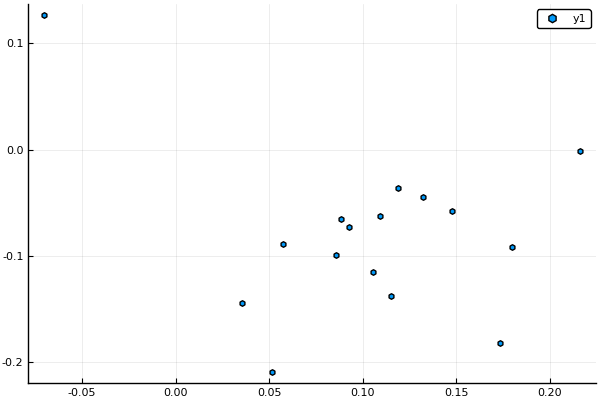

In [13]:
scatter(Flux.Tracker.data(s_seed[1,:]),Flux.Tracker.data(s_seed[2,:]), markershape = :hexagon)

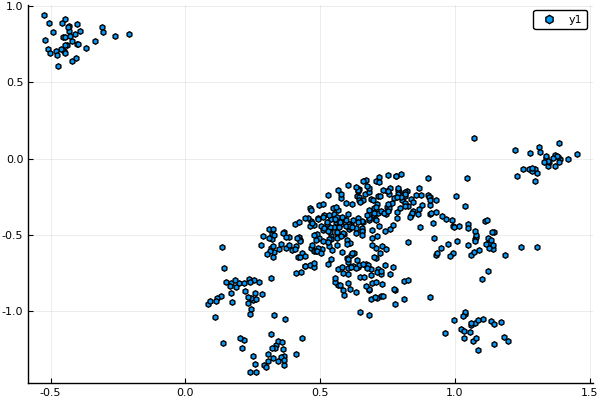

In [14]:
scatter(Flux.Tracker.data(r[1,:]),Flux.Tracker.data(r[2,:]), markershape = :hexagon)